In [1]:
import pandas as pd
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [3]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection

In [4]:
import h2o
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [6]:
np.set_printoptions(suppress=True)

<br> Research on Clustering- KMeans and Expectation Maximization:
<br> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
<br> https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
<br> http://www.blackarbs.com/blog/intro-to-expectation-maximization-k-means-gaussian-mixture-models-with-python-sklearn/3/20/2017
<br> Research on Dimensionality Reduction:
<br> https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
<br> https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html

#### Import Data Set 1.

In [7]:
facebook = pd.read_csv('Features_Variant_1.csv', header=None)
test1 = pd.read_csv('Test_Case_1.csv', header=None)
test2 = pd.read_csv('Test_Case_2.csv', header=None)
test3 = pd.read_csv('Test_case_3.csv', header=None)
test4 = pd.read_csv('Test_case_4.csv', header=None)
test5 = pd.read_csv('Test_case_5.csv', header=None)
test6 = pd.read_csv('Test_case_6.csv', header=None)
test7 = pd.read_csv('Test_case_7.csv', header=None)
test8 = pd.read_csv('Test_case_8.csv', header=None)
test9 = pd.read_csv('Test_case_9.csv', header=None)
test10 = pd.read_csv('Test_case_10.csv', header=None)

In [8]:
facebook = facebook.append([test1, test2, test3, test4, test5, test6, test7, test8, test9, test10], ignore_index=True)

In [9]:
new_names = ['PagePopularity_1', 'PageCheckins_2', 'PageTalkingAbout_3', 'PageCategory_4']
old_names = facebook.columns[0:4]
facebook.rename(columns=dict(zip(old_names, new_names)), inplace=True)

new_names2 = ['CommentsBeforeBase_30', 'CommentsLast24h_31', 'CommentsLast48to24h_32', 'CommentsFirst24h_33', 'CommentsDiffFirstSecondDay_34', 'BaseTime_35',
'PostLength_36', 'PostShareCnt_37', 'PostPromoStatus_38', 'HoursReceived_39', 'SundayPublished_40', 'MondayPublished_41', 'TuesdayPublisher_42',
'WednesdayPublished_43', 'ThursdayPublished_44', 'FridayPublished_45', 'SaturdayPublished_46', 'SundayBase_47', 'MondayBase_48', 'TuesdayBase_49',
'WednesdayBase_50', 'ThursdayBase_51', 'FridayBase_52', 'SaturdayBase_53','CommentsNextH_Hours_54']
old_names2 = facebook.columns[29:54]
facebook.rename(columns=dict(zip(old_names2, new_names2)), inplace=True)

facebook2 = facebook.iloc[:, np.r_[0:4, 29:54]]
facebook2 = facebook2.drop('PostPromoStatus_38', axis=1)

#### Scale features for use in kNN.

In [10]:
mean_1 = sum(facebook2['PagePopularity_1'])/len(facebook2['PagePopularity_1'])
sd_1 = np.std(facebook2['PagePopularity_1'])
mean_2 = sum(facebook2['PageCheckins_2'])/len(facebook2['PageCheckins_2'])
sd_2 = np.std(facebook2['PageCheckins_2'])
mean_3 = sum(facebook2['PageTalkingAbout_3'])/len(facebook2['PageTalkingAbout_3'])
sd_3 = np.std(facebook2['PageTalkingAbout_3'])
mean_4 = sum(facebook2['PageCategory_4'])/len(facebook2['PageCategory_4'])
sd_4 = np.std(facebook2['PageCategory_4'])
mean_30 = sum(facebook2['CommentsBeforeBase_30'])/len(facebook2['CommentsBeforeBase_30'])
sd_30 = np.std(facebook2['CommentsBeforeBase_30'])
mean_31 = sum(facebook2['CommentsLast24h_31'])/len(facebook2['CommentsLast24h_31'])
sd_31 = np.std(facebook2['CommentsLast24h_31'])
mean_32= sum(facebook2['CommentsLast48to24h_32'])/len(facebook2['CommentsLast48to24h_32'])
sd_32 = np.std(facebook2['CommentsLast48to24h_32'])
mean_33= sum(facebook2['CommentsFirst24h_33'])/len(facebook2['CommentsFirst24h_33'])
sd_33 = np.std(facebook2['CommentsFirst24h_33'])
mean_34 = sum(facebook2['CommentsDiffFirstSecondDay_34'])/len(facebook2['CommentsDiffFirstSecondDay_34'])
sd_34 = np.std(facebook2['CommentsDiffFirstSecondDay_34'])
mean_35 = sum(facebook2['BaseTime_35'])/len(facebook2['BaseTime_35'])
sd_35 = np.std(facebook2['BaseTime_35'])
### find out if you should scale BaseTime 
mean_36 = sum(facebook2['PostLength_36'])/len(facebook2['PostLength_36'])
sd_36 = np.std(facebook2['PostLength_36'])
mean_37 = sum(facebook2['PostShareCnt_37'])/len(facebook2['PostShareCnt_37'])
sd_37 = np.std(facebook2['PostShareCnt_37'])
### find out if you should scale HoursReceived 
mean_39 = sum(facebook2['HoursReceived_39'])/len(facebook2['HoursReceived_39'])
sd_39 = np.std(facebook2['HoursReceived_39'])
mean_40 = sum(facebook2['SundayPublished_40'])/len(facebook2['SundayPublished_40'])
sd_40 = np.std(facebook2['SundayPublished_40'])
mean_41 = sum(facebook2['MondayPublished_41'])/len(facebook2['MondayPublished_41'])
sd_41 = np.std(facebook2['MondayPublished_41'])
mean_42 = sum(facebook2['TuesdayPublisher_42'])/len(facebook2['TuesdayPublisher_42'])
sd_42 = np.std(facebook2['TuesdayPublisher_42'])
mean_43 = sum(facebook2['WednesdayPublished_43'])/len(facebook2['WednesdayPublished_43'])
sd_43 = np.std(facebook2['WednesdayPublished_43'])
mean_44 = sum(facebook2['ThursdayPublished_44'])/len(facebook2['ThursdayPublished_44'])
sd_44 = np.std(facebook2['ThursdayPublished_44'])
mean_45 = sum(facebook2['FridayPublished_45'])/len(facebook2['FridayPublished_45'])
sd_45 = np.std(facebook2['FridayPublished_45'])
mean_46 = sum(facebook2['SaturdayPublished_46'])/len(facebook2['SaturdayPublished_46'])
sd_46 = np.std(facebook2['SaturdayPublished_46'])
mean_47 = sum(facebook2['SundayBase_47'])/len(facebook2['SundayBase_47'])
sd_47 = np.std(facebook2['SundayBase_47'])
mean_48 = sum(facebook2['MondayBase_48'])/len(facebook2['MondayBase_48'])
sd_48 = np.std(facebook2['MondayBase_48'])
mean_49 = sum(facebook2['TuesdayBase_49'])/len(facebook2['TuesdayBase_49'])
sd_49 = np.std(facebook2['TuesdayBase_49'])
mean_50 = sum(facebook2['WednesdayBase_50'])/len(facebook2['WednesdayBase_50'])
sd_50 = np.std(facebook2['WednesdayBase_50'])
mean_51 = sum(facebook2['ThursdayBase_51'])/len(facebook2['ThursdayBase_51'])
sd_51 = np.std(facebook2['ThursdayBase_51'])
mean_52 = sum(facebook2['FridayBase_52'])/len(facebook2['FridayBase_52'])
sd_52 = np.std(facebook2['FridayBase_52'])
mean_53 = sum(facebook2['SaturdayBase_53'])/len(facebook2['SaturdayBase_53'])
sd_53 = np.std(facebook2['SaturdayBase_53'])
## DO NOT scale the target (54)

In [11]:
facebook2_s = facebook2.copy()

In [12]:
facebook2_s.head()

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,...,FridayPublished_45,SaturdayPublished_46,SundayBase_47,MondayBase_48,TuesdayBase_49,WednesdayBase_50,ThursdayBase_51,FridayBase_52,SaturdayBase_53,CommentsNextH_Hours_54
0,634995,0,463,1,0,0,0,0,0,65,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0,0,0,0,0,10,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0,0,0,0,0,14,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,7,0,3,7,-3,62,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,1,0,0,1,0,58,...,0,0,0,0,0,1,0,0,0,0


In [13]:
facebook2_s['PagePopularity_1'] = (facebook2['PagePopularity_1'] - mean_1)/sd_1
facebook2_s['PageCheckins_2'] = (facebook2['PageCheckins_2'] - mean_2)/sd_2
facebook2_s['PageTalkingAbout_3'] = (facebook2['PageTalkingAbout_3'] - mean_3)/sd_3
facebook2_s['PageCategory_4'] = (facebook2['PageCategory_4'] - mean_4)/sd_4
facebook2_s['CommentsBeforeBase_30'] = (facebook2['CommentsBeforeBase_30'] - mean_30)/sd_30
facebook2_s['CommentsLast24h_31'] = (facebook2['CommentsLast24h_31'] - mean_31)/sd_31
facebook2_s['CommentsLast48to24h_32'] = (facebook2['CommentsLast48to24h_32'] - mean_32)/sd_32
facebook2_s['CommentsFirst24h_33'] = (facebook2['CommentsFirst24h_33'] - mean_33)/sd_33
facebook2_s['CommentsDiffFirstSecondDay_34'] = (facebook2['CommentsDiffFirstSecondDay_34'] - mean_34)/sd_34
facebook2_s['BaseTime_35'] = (facebook2['BaseTime_35'] - mean_35)/sd_35
facebook2_s['PostLength_36'] = (facebook2['PostLength_36'] - mean_36)/sd_36
facebook2_s['PostShareCnt_37'] = (facebook2['PostShareCnt_37'] - mean_37)/sd_37
##facebook2_s['PostPromoStatus_38'] = (facebook2['PostPromoStatus_38'] - mean_38)/sd_38 --- appears to be zero
## check to see if 39 should be scaled
facebook2_s['HoursReceived_39'] = (facebook2['HoursReceived_39'] - mean_39)/sd_39
facebook2_s['SundayPublished_40'] = (facebook2['SundayPublished_40'] - mean_40)/sd_40
facebook2_s['MondayPublished_41'] = (facebook2['MondayPublished_41'] - mean_41)/sd_41
facebook2_s['TuesdayPublisher_42'] = (facebook2['TuesdayPublisher_42'] - mean_42)/sd_42
facebook2_s['WednesdayPublished_43'] = (facebook2['WednesdayPublished_43'] - mean_43)/sd_43
facebook2_s['ThursdayPublished_44'] = (facebook2['ThursdayPublished_44'] - mean_44)/sd_44
facebook2_s['FridayPublished_45'] = (facebook2['FridayPublished_45'] - mean_45)/sd_45
facebook2_s['SaturdayPublished_46'] = (facebook2['SaturdayPublished_46'] - mean_46)/sd_46
facebook2_s['SundayBase_47'] = (facebook2['SundayBase_47'] - mean_47)/sd_47
facebook2_s['MondayBase_48'] = (facebook2['MondayBase_48'] - mean_48)/sd_48
facebook2_s['TuesdayBase_49'] = (facebook2['TuesdayBase_49'] - mean_49)/sd_49
facebook2_s['WednesdayBase_50'] = (facebook2['WednesdayBase_50'] - mean_50)/sd_50
facebook2_s['ThursdayBase_51'] = (facebook2['ThursdayBase_51'] - mean_51)/sd_51
facebook2_s['FridayBase_52'] = (facebook2['FridayBase_52'] - mean_52)/sd_52
facebook2_s['SaturdayBase_53'] = (facebook2['SaturdayBase_53'] - mean_53)/sd_53
## don't scales the target
facebook2_s['CommentsNextH_Hours_54'] = facebook2['CommentsNextH_Hours_54']

In [14]:
facebook2_s.head()

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,...,FridayPublished_45,SaturdayPublished_46,SundayBase_47,MondayBase_48,TuesdayBase_49,WednesdayBase_50,ThursdayBase_51,FridayBase_52,SaturdayBase_53,CommentsNextH_Hours_54
0,-0.107749,-0.220202,-0.359973,-1.161633,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,1.433400,...,-0.417790,-0.40196,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,-0.411513,2.415662,0
1,-0.107749,-0.220202,-0.359973,-1.161633,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,-1.186168,...,-0.417790,-0.40196,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,2.430059,-0.413965,0
2,-0.107749,-0.220202,-0.359973,-1.161633,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,-0.995654,...,2.393547,-0.40196,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,-0.411513,2.415662,0
3,-0.107749,-0.220202,-0.359973,-1.161633,-0.348015,-0.277312,-0.228578,-0.347915,-0.066027,1.290515,...,2.393547,-0.40196,-0.413886,2.541964,-0.393962,-0.411909,-0.418774,-0.411513,-0.413965,0
4,-0.107749,-0.220202,-0.359973,-1.161633,-0.389937,-0.277312,-0.269467,-0.392598,-0.036157,1.100001,...,-0.417790,-0.40196,-0.413886,-0.393397,-0.393962,2.427723,-0.418774,-0.411513,-0.413965,0


#### Estlish binary classification label.

In [15]:
#### Create binary variable for classification analysis. Apply to both the scaled and unscaled data sets.

facebook2['Comment_Y'] = facebook2['CommentsNextH_Hours_54']>0
facebook2['Comment_Y'] = facebook2['Comment_Y'].apply(int)
facebook2_s['Comment_Y'] = facebook2['Comment_Y']

In [16]:
X = facebook2.iloc[:, 0:27]
y = facebook2.iloc[:, 28:29]
X_s = facebook2_s.iloc[:, 0:27]
y_s = pd.DataFrame(facebook2_s.iloc[:, 28:29])

In [17]:
facebook2_s.columns

Index(['PagePopularity_1', 'PageCheckins_2', 'PageTalkingAbout_3',
       'PageCategory_4', 'CommentsBeforeBase_30', 'CommentsLast24h_31',
       'CommentsLast48to24h_32', 'CommentsFirst24h_33',
       'CommentsDiffFirstSecondDay_34', 'BaseTime_35', 'PostLength_36',
       'PostShareCnt_37', 'HoursReceived_39', 'SundayPublished_40',
       'MondayPublished_41', 'TuesdayPublisher_42', 'WednesdayPublished_43',
       'ThursdayPublished_44', 'FridayPublished_45', 'SaturdayPublished_46',
       'SundayBase_47', 'MondayBase_48', 'TuesdayBase_49', 'WednesdayBase_50',
       'ThursdayBase_51', 'FridayBase_52', 'SaturdayBase_53',
       'CommentsNextH_Hours_54', 'Comment_Y'],
      dtype='object')

In [18]:
X_s.columns

Index(['PagePopularity_1', 'PageCheckins_2', 'PageTalkingAbout_3',
       'PageCategory_4', 'CommentsBeforeBase_30', 'CommentsLast24h_31',
       'CommentsLast48to24h_32', 'CommentsFirst24h_33',
       'CommentsDiffFirstSecondDay_34', 'BaseTime_35', 'PostLength_36',
       'PostShareCnt_37', 'HoursReceived_39', 'SundayPublished_40',
       'MondayPublished_41', 'TuesdayPublisher_42', 'WednesdayPublished_43',
       'ThursdayPublished_44', 'FridayPublished_45', 'SaturdayPublished_46',
       'SundayBase_47', 'MondayBase_48', 'TuesdayBase_49', 'WednesdayBase_50',
       'ThursdayBase_51', 'FridayBase_52', 'SaturdayBase_53'],
      dtype='object')

#### Save small portion of test data for later use in experimentation (as needed).

In [19]:
from sklearn.model_selection import train_test_split

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_s, y_s, test_size=0.1, random_state=4786)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4786)

# Step 1: Clustering

## KMeans.

In [20]:
kmeans2 = KMeans(n_clusters=2, random_state=45192).fit(Xs_train)
kmeans3 = KMeans(n_clusters=3, random_state=45192).fit(Xs_train)
kmeans4 = KMeans(n_clusters=4, random_state=45192).fit(Xs_train)
kmeans5 = KMeans(n_clusters=5, random_state=45192).fit(Xs_train)
kmeans6 = KMeans(n_clusters=6, random_state=45192).fit(Xs_train)

In [21]:
Xs_train['KM_2clust'] = kmeans2.labels_
Xs_train['KM_3clust'] = kmeans3.labels_
Xs_train['KM_4clust'] = kmeans4.labels_
Xs_train['KM_5clust'] = kmeans5.labels_
Xs_train['KM_6clust'] = kmeans6.labels_

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [22]:
Xs_train.head()

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,...,TuesdayBase_49,WednesdayBase_50,ThursdayBase_51,FridayBase_52,SaturdayBase_53,KM_2clust,KM_3clust,KM_4clust,KM_5clust,KM_6clust
15596,-0.141154,-0.220202,-0.133185,0.891421,0.741947,-0.229912,0.057644,0.664894,-0.235290,1.576286,...,-0.393962,-0.411909,2.387926,-0.411513,-0.413965,0,1,2,4,4
38592,-0.100597,-0.220202,0.159681,-0.761037,-0.173342,-0.241762,0.125793,-0.169184,-0.295030,-0.185969,...,2.538315,-0.411909,-0.418774,-0.411513,-0.413965,0,0,3,3,0
26530,-0.198393,-0.220202,-0.362849,-0.360441,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,-0.948025,...,-0.393962,-0.411909,-0.418774,2.430059,-0.413965,0,1,2,2,3
40956,0.101916,-0.212882,0.725706,1.642538,-0.215264,0.030784,-0.269467,-0.206420,0.222715,-1.424310,...,-0.393962,-0.411909,2.387926,-0.411513,-0.413965,0,1,2,4,3
39883,0.237638,-0.220202,-0.018795,-1.061484,-0.257185,-0.040315,-0.269467,-0.251103,0.162975,-1.281425,...,-0.393962,-0.411909,2.387926,-0.411513,-0.413965,0,1,2,4,4


In [23]:
attributes = X_s.columns
centers_2clust = kmeans2.cluster_centers_
centers_3clust = kmeans3.cluster_centers_
centers_4clust = kmeans4.cluster_centers_
centers_5clust = kmeans5.cluster_centers_
centers_6clust = kmeans6.cluster_centers_

In [24]:
centers_6clust[:, 1]

array([ 0.00119899,  0.00738816,  0.2809487 , -0.0088548 , -0.01818111,
        0.00085925])

Text(0.5, 1.0, 'Post Share Count vs. Hours Received')

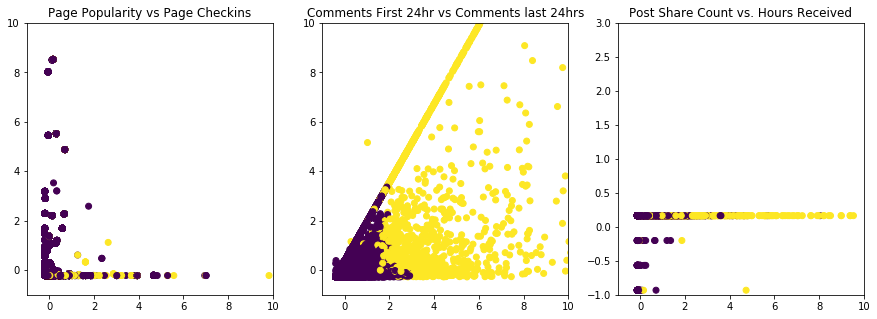

In [25]:
fig, ax1 = plt.subplots(figsize=(15,5))
plt.subplot(131)
plt.scatter(Xs_train['PagePopularity_1'], Xs_train['PageCheckins_2'], c=Xs_train['KM_2clust'])
plt.ylim(-1.00,10.00)
plt.xlim(-1.00,10.00)
plt.title("Page Popularity vs Page Checkins")
plt.subplot(132)
plt.scatter(Xs_train['CommentsFirst24h_33'], Xs_train['CommentsLast24h_31'], c=Xs_train['KM_2clust'])
plt.ylim(-1.00,10.00)
plt.xlim(-1.00,10.00)
plt.title("Comments First 24hr vs Comments last 24hrs")
plt.subplot(133)
plt.scatter(Xs_train['PostShareCnt_37'], Xs_train['HoursReceived_39'], c=Xs_train['KM_2clust'])
plt.ylim(-1.00,3.00)
plt.xlim(-1.00,10.00)
plt.title("Post Share Count vs. Hours Received")

In [29]:
meanGroup2_clust0 = centers_2clust[0, :]
meanGroup2_clust1 = centers_2clust[1, :]
group2_clust0 = Xs_train[Xs_train['KM_2clust']==0]
group2_clust1 = Xs_train[Xs_train['KM_2clust']==1]
group2_clust0.head()

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,...,TuesdayBase_49,WednesdayBase_50,ThursdayBase_51,FridayBase_52,SaturdayBase_53,KM_2clust,KM_3clust,KM_4clust,KM_5clust,KM_6clust
15596,-0.141154,-0.220202,-0.133185,0.891421,0.741947,-0.229912,0.057644,0.664894,-0.235290,1.576286,...,-0.393962,-0.411909,2.387926,-0.411513,-0.413965,0,1,2,4,4
38592,-0.100597,-0.220202,0.159681,-0.761037,-0.173342,-0.241762,0.125793,-0.169184,-0.295030,-0.185969,...,2.538315,-0.411909,-0.418774,-0.411513,-0.413965,0,0,3,3,0
26530,-0.198393,-0.220202,-0.362849,-0.360441,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,-0.948025,...,-0.393962,-0.411909,-0.418774,2.430059,-0.413965,0,1,2,2,3
40956,0.101916,-0.212882,0.725706,1.642538,-0.215264,0.030784,-0.269467,-0.206420,0.222715,-1.424310,...,-0.393962,-0.411909,2.387926,-0.411513,-0.413965,0,1,2,4,3
39883,0.237638,-0.220202,-0.018795,-1.061484,-0.257185,-0.040315,-0.269467,-0.251103,0.162975,-1.281425,...,-0.393962,-0.411909,2.387926,-0.411513,-0.413965,0,1,2,4,4


In [119]:
meanGroup2_clust0

array([-0.03364589, -0.01082616, -0.06391962,  0.01829398, -0.15213561,
       -0.11359184, -0.10985554, -0.15260158, -0.01519262, -0.00145812,
        0.0013629 , -0.04897029,  0.01187734, -0.00504654,  0.00087312,
        0.00084823, -0.00202189, -0.00012182,  0.00190495,  0.00333718,
        0.00002208, -0.00256505,  0.00251645,  0.00121679, -0.00147163,
        0.00048619, -0.00019077])

In [120]:
meanGroup2_clust1

array([ 0.83305421,  0.3451865 ,  1.61273159, -0.44281495,  3.81001841,
        2.88019892,  2.75354458,  3.82772868,  0.40853573, -0.06209547,
       -0.05843868,  1.17672254, -0.30228523,  0.08215938,  0.00784908,
        0.00651929,  0.05053324,  0.00132589, -0.08578823, -0.05869975,
       -0.0581805 ,  0.03231169, -0.01122698,  0.02541025,  0.00959701,
        0.02806741, -0.02508678])

In [30]:
ICDgroup2_clust0 = group2_clust0.iloc[:, 0:27] - meanGroup2_clust0
ICDgroup2_clust1 = group2_clust1.iloc[:, 0:27] - meanGroup2_clust1

In [31]:
ICDgroup2_clust0sq = ICDgroup2_clust0**2
ICDgroup2_clust0sq.mean()

PagePopularity_1                 0.150854
PageCheckins_2                   0.936827
PageTalkingAbout_3               0.463327
PageCategory_4                   1.021498
CommentsBeforeBase_30            0.171161
CommentsLast24h_31               0.160432
CommentsLast48to24h_32           0.167089
CommentsFirst24h_33              0.172953
CommentsDiffFirstSecondDay_34    0.187346
BaseTime_35                      1.011374
PostLength_36                    0.971107
PostShareCnt_37                  0.054170
HoursReceived_39                 0.930403
SundayPublished_40               0.988638
MondayPublished_41               1.001771
TuesdayPublisher_42              1.001675
WednesdayPublished_43            0.996091
ThursdayPublished_44             0.999734
FridayPublished_45               1.003737
SaturdayPublished_46             1.006927
SundayBase_47                    1.000021
MondayBase_48                    0.994459
TuesdayBase_49                   1.005539
WednesdayBase_50                 1

In [32]:
ICDgroup2_clust1sq = ICDgroup2_clust1**2
ICDgroup2_clust1sq.mean()

PagePopularity_1                 20.149435
PageCheckins_2                    3.050056
PageTalkingAbout_3               12.069253
PageCategory_4                    0.364780
CommentsBeforeBase_30             6.436684
CommentsLast24h_31               13.321392
CommentsLast48to24h_32           14.089943
CommentsFirst24h_33               6.307673
CommentsDiffFirstSecondDay_34    21.202098
BaseTime_35                       0.789314
PostLength_36                     0.608482
PostShareCnt_37                  20.550949
HoursReceived_39                  2.698934
SundayPublished_40                1.176776
MondayPublished_41                1.016660
TuesdayPublisher_42               1.013594
WednesdayPublished_43             1.095069
ThursdayPublished_44              1.003221
FridayPublished_45                0.823636
SaturdayPublished_46              0.874638
SundayBase_47                     0.880645
MondayBase_48                     1.068993
TuesdayBase_49                    0.971982
WednesdayBa

In [33]:
cluster2_0 = pd.DataFrame(Xs_train[Xs_train['KM_2clust']==0].median())
cluster2_1 = pd.DataFrame(Xs_train[Xs_train['KM_2clust']==1].median())
cluster2_1 = cluster2_1.rename({0:1}, axis=1)
cluster2 = cluster2_0.merge(cluster2_1, left_index=True, right_index=True)

In [34]:
print(len(Xs_train[Xs_train['KM_2clust']==0]), len(Xs_train[Xs_train['KM_2clust']==1]))
### most records are grouped in one large cluster

36307 1447


In [35]:
### cluster one is more popular pages with many more comments
cluster2[0:27]

,0,1
PagePopularity_1,-0.160390,0.171639
PageCheckins_2,-0.220202,-0.220156
PageTalkingAbout_3,-0.316841,0.657006
PageCategory_4,-0.310367,-0.761037
CommentsBeforeBase_30,-0.327055,3.110519
CommentsLast24h_31,-0.253612,1.618664
CommentsLast48to24h_32,-0.269467,1.665941
CommentsFirst24h_33,-0.325574,3.100106
CommentsDiffFirstSecondDay_34,-0.036157,-0.683339
BaseTime_35,-0.043084,-0.138341


In [36]:
cluster0_ind = Xs_train[Xs_train['KM_2clust']==0].index
cluster1_ind = Xs_train[Xs_train['KM_2clust']==1].index

commentY_c0 = ys_train[ys_train.index.isin(cluster0_ind)]
commentY_c1 = ys_train[ys_train.index.isin(cluster1_ind)]

print("Cluster 0, Comment-Negative:", commentY_c0[commentY_c0==0].count(), "Cluster 0, Comment-Positive:", \
      commentY_c0[commentY_c0==1].count(), "Cluster 1, Comment-Negative:", commentY_c1[commentY_c1==0].count(), \
      "Cluster 1, Comment-Positive:", commentY_c1[commentY_c1==1].count())

Cluster 0, Comment-Negative: Comment_Y    20569
dtype: int64 Cluster 0, Comment-Positive: Comment_Y    15738
dtype: int64 Cluster 1, Comment-Negative: Comment_Y    73
dtype: int64 Cluster 1, Comment-Positive: Comment_Y    1374
dtype: int64


In [37]:
1374/(73+1374)

0.949550794747754

In [38]:
15738/(15738+20569)

0.4334701297270499

Cluster 1 is mostly Comment Y positive- good separation. Maybe Cluster could be split into two clusters resulting in a better split of the labels.

In [39]:
cluster3_0 = pd.DataFrame(Xs_train[Xs_train['KM_3clust']==0].mean())
cluster3_1 = pd.DataFrame(Xs_train[Xs_train['KM_3clust']==1].mean())
cluster3_2 = pd.DataFrame(Xs_train[Xs_train['KM_3clust']==2].mean())
cluster3_1 = cluster3_1.rename({0:1}, axis=1)
cluster3_2 = cluster3_2.rename({0:2}, axis=1)
cluster3 = cluster2_0.merge(cluster3_1, left_index=True, right_index=True)
cluster3 = cluster3.merge(cluster3_2, left_index=True, right_index=True)
cluster3[0:27]

,0,1,2
PagePopularity_1,-0.160390,-0.031178,0.875335
PageCheckins_2,-0.220202,-0.010433,0.322746
PageTalkingAbout_3,-0.316841,-0.053284,1.653089
PageCategory_4,-0.310367,0.016815,-0.447729
CommentsBeforeBase_30,-0.327055,-0.145632,4.006227
CommentsLast24h_31,-0.253612,-0.100350,3.033947
CommentsLast48to24h_32,-0.269467,-0.111845,2.895477
CommentsFirst24h_33,-0.325574,-0.145562,4.023245
CommentsDiffFirstSecondDay_34,-0.036157,-0.002613,0.434036
BaseTime_35,-0.043084,-0.025131,-0.057090


In [40]:
kmeans3.cluster_centers_

array([[-0.03295109, -0.00689413, -0.06576362,  0.0167858 , -0.14404972,
        -0.11683141, -0.09684227, -0.1449021 , -0.02742099,  0.02311941,
        -0.00425118, -0.04697823,  0.07213447,  0.2450299 , -0.29484687,
        -0.41376759, -0.42621822,  0.03216542,  0.44728591,  0.43759463,
         0.44340954,  0.40729283,  0.00195793, -0.41190867, -0.41877351,
        -0.28540028,  0.27899171],
       [-0.03115309, -0.01044389, -0.05272161,  0.01680321, -0.14560498,
        -0.10029143, -0.11185312, -0.14553292, -0.00255791, -0.02520517,
         0.00633361, -0.04693388, -0.04655816, -0.23840321,  0.27670956,
         0.38856112,  0.39343114, -0.03087662, -0.41331907, -0.40195981,
        -0.41388613, -0.3849939 ,  0.00272854,  0.38726451,  0.38779541,
         0.26769878, -0.26111366],
       [ 0.87566706,  0.32315829,  1.6463162 , -0.44790955,  4.00900183,
         3.0354921 ,  2.89788391,  4.02599666,  0.43357631, -0.05605008,
        -0.06076089,  1.24485303, -0.30112597,  0.0962

In [41]:
cluster3_0 = pd.DataFrame(Xs_train[Xs_train['KM_3clust']==0].median())
cluster3_1 = pd.DataFrame(Xs_train[Xs_train['KM_3clust']==1].median())
cluster3_2 = pd.DataFrame(Xs_train[Xs_train['KM_3clust']==2].median())
cluster3_1 = cluster3_1.rename({0:1}, axis=1)
cluster3_2 = cluster3_2.rename({0:2}, axis=1)
cluster3 = cluster2_0.merge(cluster3_1, left_index=True, right_index=True)
cluster3 = cluster3.merge(cluster3_2, left_index=True, right_index=True)
cluster3[0:27]
### cluster 2 is the new cluster 1

,0,1,2
PagePopularity_1,-0.160390,-0.160390,0.176933
PageCheckins_2,-0.220202,-0.220202,-0.220156
PageTalkingAbout_3,-0.316841,-0.317217,0.657006
PageCategory_4,-0.310367,-0.310367,-0.761037
CommentsBeforeBase_30,-0.327055,-0.327055,3.288686
CommentsLast24h_31,-0.253612,-0.253612,1.689764
CommentsLast48to24h_32,-0.269467,-0.269467,1.761349
CommentsFirst24h_33,-0.325574,-0.333021,3.256496
CommentsDiffFirstSecondDay_34,-0.036157,-0.036157,-0.703252
BaseTime_35,-0.043084,-0.090712,-0.138341


In [42]:
meanGroup3_clust0 = centers_3clust[0, :]
meanGroup3_clust1 = centers_3clust[1, :]
meanGroup3_clust2 = centers_3clust[2, :]

group3_clust0 = Xs_train[Xs_train['KM_3clust']==0]
group3_clust1 = Xs_train[Xs_train['KM_3clust']==1]
group3_clust2 = Xs_train[Xs_train['KM_3clust']==2]

ICDgroup3_clust0 = group3_clust0.iloc[:, 0:27] - meanGroup3_clust0
ICDgroup3_clust1 = group3_clust1.iloc[:, 0:27] - meanGroup3_clust1
ICDgroup3_clust2 = group3_clust2.iloc[:, 0:27] - meanGroup3_clust2

ICDgroup3_clust0sq = ICDgroup3_clust0**2
ICDgroup3_clust0sq.mean()

PagePopularity_1                 1.552185e-01
PageCheckins_2                   1.046634e+00
PageTalkingAbout_3               4.622954e-01
PageCategory_4                   1.019096e+00
CommentsBeforeBase_30            1.861968e-01
CommentsLast24h_31               1.626070e-01
CommentsLast48to24h_32           1.889078e-01
CommentsFirst24h_33              1.874238e-01
CommentsDiffFirstSecondDay_34    1.981314e-01
BaseTime_35                      1.006723e+00
PostLength_36                    1.065572e+00
PostShareCnt_37                  5.658591e-02
HoursReceived_39                 5.615328e-01
SundayPublished_40               1.498525e+00
MondayPublished_41               3.068642e-01
TuesdayPublisher_42              2.391731e-27
WednesdayPublished_43            2.196762e-28
ThursdayPublished_44             1.063229e+00
FridayPublished_45               1.683663e+00
SaturdayPublished_46             1.721268e+00
SundayBase_47                    1.691199e+00
MondayBase_48                    1

In [43]:
ICDgroup3_clust1sq = ICDgroup3_clust1**2
ICDgroup3_clust1sq.mean()

PagePopularity_1                 1.522254e-01
PageCheckins_2                   8.577670e-01
PageTalkingAbout_3               5.014245e-01
PageCategory_4                   1.020135e+00
CommentsBeforeBase_30            1.861686e-01
CommentsLast24h_31               1.857101e-01
CommentsLast48to24h_32           1.773622e-01
CommentsFirst24h_33              1.887628e-01
CommentsDiffFirstSecondDay_34    2.087162e-01
BaseTime_35                      1.013350e+00
PostLength_36                    8.803298e-01
PostShareCnt_37                  5.795250e-02
HoursReceived_39                 1.279159e+00
SundayPublished_40               3.997256e-01
MondayPublished_41               1.492169e+00
TuesdayPublisher_42              1.627379e+00
WednesdayPublished_43            1.600648e+00
ThursdayPublished_44             9.373995e-01
FridayPublished_45               1.255004e-02
SaturdayPublished_46             1.842121e-26
SundayBase_47                    1.806134e-26
MondayBase_48                    2

In [44]:
ICDgroup3_clust2sq = ICDgroup3_clust2**2
ICDgroup3_clust2sq.mean()

PagePopularity_1                 22.062711
PageCheckins_2                    2.950619
PageTalkingAbout_3               12.835273
PageCategory_4                    0.367344
CommentsBeforeBase_30             6.626956
CommentsLast24h_31               14.198032
CommentsLast48to24h_32           15.018050
CommentsFirst24h_33               6.493592
CommentsDiffFirstSecondDay_34    22.836494
BaseTime_35                       0.785830
PostLength_36                     0.611248
PostShareCnt_37                  22.485731
HoursReceived_39                  2.712555
SundayPublished_40                1.209421
MondayPublished_41                1.011862
TuesdayPublisher_42               0.972370
WednesdayPublished_43             1.097146
ThursdayPublished_44              1.021490
FridayPublished_45                0.812054
SaturdayPublished_46              0.882228
SundayBase_47                     0.891898
MondayBase_48                     1.096753
TuesdayBase_49                    0.981727
WednesdayBa

In [45]:
print(len(Xs_train[Xs_train['KM_3clust']==0]), len(Xs_train[Xs_train['KM_3clust']==1]), len(Xs_train[Xs_train['KM_3clust']==2]))
### more evenly distributed, but cannot see meaningful difference between clusers 0 and 1

17575 18863 1316


In [46]:
cluster0_ind = Xs_train[Xs_train['KM_3clust']==0].index
cluster1_ind = Xs_train[Xs_train['KM_3clust']==1].index
cluster2_ind = Xs_train[Xs_train['KM_3clust']==2].index

commentY_c0 = ys_train[ys_train.index.isin(cluster0_ind)]
commentY_c1 = ys_train[ys_train.index.isin(cluster1_ind)]
commentY_c2 = ys_train[ys_train.index.isin(cluster2_ind)]

print("Cluster 0, Comment-Negative:", commentY_c0[commentY_c0==0].count(), "Cluster 0, Comment-Positive:", \
      commentY_c0[commentY_c0==1].count(), "Cluster 1, Comment-Negative:", commentY_c1[commentY_c1==0].count(), \
      "Cluster 1, Comment-Positive:", commentY_c1[commentY_c1==1].count(), "Cluster 2, Comment-Negative:", \
      commentY_c2[commentY_c2==0].count(), "Cluster 2, Comment-Positive:", commentY_c2[commentY_c2==1].count())

Cluster 0, Comment-Negative: Comment_Y    9914
dtype: int64 Cluster 0, Comment-Positive: Comment_Y    7661
dtype: int64 Cluster 1, Comment-Negative: Comment_Y    10664
dtype: int64 Cluster 1, Comment-Positive: Comment_Y    8199
dtype: int64 Cluster 2, Comment-Negative: Comment_Y    64
dtype: int64 Cluster 2, Comment-Positive: Comment_Y    1252
dtype: int64


Small improvement, but not a great split in clusters 0 and 1.

#### KMeans- 4 clusters.

In [47]:
cluster4_0 = pd.DataFrame(Xs_train[Xs_train['KM_4clust']==0].median())
cluster4_1 = pd.DataFrame(Xs_train[Xs_train['KM_4clust']==1].median())
cluster4_2 = pd.DataFrame(Xs_train[Xs_train['KM_4clust']==2].median())
cluster4_3 = pd.DataFrame(Xs_train[Xs_train['KM_4clust']==3].median())
cluster4_1 = cluster4_1.rename({0:1}, axis=1)
cluster4_2 = cluster4_2.rename({0:2}, axis=1)
cluster4_3 = cluster4_3.rename({0:3}, axis=1)
cluster4 = cluster4_0.merge(cluster4_1, left_index=True, right_index=True)
cluster4 = cluster4.merge(cluster4_2, left_index=True, right_index=True)
cluster4 = cluster4.merge(cluster4_3, left_index=True, right_index=True)
cluster4[0:27]

,0,1,2,3
PagePopularity_1,0.189847,-0.161080,-0.158422,-0.158422
PageCheckins_2,-0.220156,-0.220202,-0.220202,-0.220202
PageTalkingAbout_3,0.726271,-0.317275,-0.316841,-0.310909
PageCategory_4,-0.761037,-0.310367,-0.310367,-0.310367
CommentsBeforeBase_30,3.459866,-0.327055,-0.334042,-0.313081
CommentsLast24h_31,1.760863,-0.253612,-0.253612,-0.265462
CommentsLast48to24h_32,1.897645,-0.269467,-0.269467,-0.255837
CommentsFirst24h_33,3.479910,-0.333021,-0.333021,-0.318127
CommentsDiffFirstSecondDay_34,-0.762992,-0.036157,-0.036157,-0.046114
BaseTime_35,-0.138341,0.004545,-0.424112,0.528459


In [48]:
print(len(Xs_train[Xs_train['KM_4clust']==0]), len(Xs_train[Xs_train['KM_4clust']==1]), len(Xs_train[Xs_train['KM_4clust']==2]), len(Xs_train[Xs_train['KM_4clust']==3]))
### more evenly distributed, but cannot see meaningful difference between clusers 0 and 1

1205 5349 18487 12713


In [49]:
meanGroup4_clust0 = centers_4clust[0, :]
meanGroup4_clust1 = centers_4clust[1, :]
meanGroup4_clust2 = centers_4clust[2, :]
meanGroup4_clust3 = centers_4clust[3, :]
group4_clust0 = Xs_train[Xs_train['KM_3clust']==0]
group4_clust1 = Xs_train[Xs_train['KM_3clust']==1]
group4_clust2 = Xs_train[Xs_train['KM_3clust']==2]
group4_clust3 = Xs_train[Xs_train['KM_3clust']==3]

ICDgroup3_clust0 = group4_clust0.iloc[:, 0:27] - meanGroup4_clust0
ICDgroup3_clust1 = group4_clust1.iloc[:, 0:27] - meanGroup4_clust1
ICDgroup3_clust2 = group4_clust2.iloc[:, 0:27] - meanGroup4_clust2
ICDgroup3_clust3 = group4_clust3.iloc[:, 0:27] - meanGroup4_clust3

In [50]:
cluster0_ind = Xs_train[Xs_train['KM_4clust']==0].index
cluster1_ind = Xs_train[Xs_train['KM_4clust']==1].index
cluster2_ind = Xs_train[Xs_train['KM_4clust']==2].index
cluster3_ind = Xs_train[Xs_train['KM_4clust']==3].index

commentY_c0 = ys_train[ys_train.index.isin(cluster0_ind)]
commentY_c1 = ys_train[ys_train.index.isin(cluster1_ind)]
commentY_c2 = ys_train[ys_train.index.isin(cluster2_ind)]
commentY_c3 = ys_train[ys_train.index.isin(cluster3_ind)]

print("Cluster 0, Comment-Negative:", commentY_c0[commentY_c0==0].count(), "Cluster 0, Comment-Positive:", \
      commentY_c0[commentY_c0==1].count(), "Cluster 1, Comment-Negative:", commentY_c1[commentY_c1==0].count(), \
      "Cluster 1, Comment-Positive:", commentY_c1[commentY_c1==1].count(), "Cluster 2, Comment-Negative:", \
      commentY_c2[commentY_c2==0].count(), "Cluster 2, Comment-Positive:", commentY_c2[commentY_c2==1].count(),\
      "Cluster 3, Comment-Negative:", commentY_c3[commentY_c3==0].count(), "Cluster 3, Comment-Positive:", \
      commentY_c3[commentY_c3==1].count())

Cluster 0, Comment-Negative: Comment_Y    55
dtype: int64 Cluster 0, Comment-Positive: Comment_Y    1150
dtype: int64 Cluster 1, Comment-Negative: Comment_Y    3044
dtype: int64 Cluster 1, Comment-Positive: Comment_Y    2305
dtype: int64 Cluster 2, Comment-Negative: Comment_Y    9483
dtype: int64 Cluster 2, Comment-Positive: Comment_Y    9004
dtype: int64 Cluster 3, Comment-Negative: Comment_Y    8060
dtype: int64 Cluster 3, Comment-Positive: Comment_Y    4653
dtype: int64


In [51]:
cluster5_0 = pd.DataFrame(Xs_train[Xs_train['KM_5clust']==0].median())
cluster5_1 = pd.DataFrame(Xs_train[Xs_train['KM_5clust']==1].median())
cluster5_2 = pd.DataFrame(Xs_train[Xs_train['KM_5clust']==2].median())
cluster5_3 = pd.DataFrame(Xs_train[Xs_train['KM_5clust']==3].median())
cluster5_4 = pd.DataFrame(Xs_train[Xs_train['KM_5clust']==4].median())
cluster5_1 = cluster5_1.rename({0:1}, axis=1)
cluster5_2 = cluster5_2.rename({0:2}, axis=1)
cluster5_3 = cluster5_3.rename({0:3}, axis=1)
cluster5_4 = cluster5_4.rename({0:4}, axis=1)
cluster5 = cluster5_0.merge(cluster5_1, left_index=True, right_index=True)
cluster5 = cluster5.merge(cluster5_2, left_index=True, right_index=True)
cluster5 = cluster5.merge(cluster5_3, left_index=True, right_index=True)
cluster5 = cluster5.merge(cluster5_4, left_index=True, right_index=True)
cluster5[0:27]

,0,1,2,3,4
PagePopularity_1,0.191322,-0.156962,-0.160390,-0.158422,-0.160390
PageCheckins_2,-0.220156,-0.220202,-0.220202,-0.220202,-0.220202
PageTalkingAbout_3,0.748486,-0.304274,-0.316841,-0.307896,-0.318550
PageCategory_4,-0.761037,-0.310367,-0.310367,-0.310367,-0.310367
CommentsBeforeBase_30,3.655500,-0.320068,-0.327055,-0.327055,-0.320068
CommentsLast24h_31,1.903061,-0.253612,-0.253612,-0.253612,-0.265462
CommentsLast48to24h_32,1.979423,-0.269467,-0.269467,-0.269467,-0.255837
CommentsFirst24h_33,3.658641,-0.325574,-0.333021,-0.325574,-0.325574
CommentsDiffFirstSecondDay_34,-0.782905,-0.036157,-0.036157,-0.036157,-0.046114
BaseTime_35,-0.138341,-0.233598,-0.138341,-0.281226,0.528459


In [52]:
print(len(Xs_train[Xs_train['KM_5clust']==0]), len(Xs_train[Xs_train['KM_5clust']==1]), \
      len(Xs_train[Xs_train['KM_5clust']==2]), len(Xs_train[Xs_train['KM_5clust']==3]), len(Xs_train[Xs_train['KM_5clust']==4]))

1099 8370 9732 9343 9210


In [53]:
cluster0_ind = Xs_train[Xs_train['KM_5clust']==0].index
cluster1_ind = Xs_train[Xs_train['KM_5clust']==1].index
cluster2_ind = Xs_train[Xs_train['KM_5clust']==2].index
cluster3_ind = Xs_train[Xs_train['KM_5clust']==3].index
cluster4_ind = Xs_train[Xs_train['KM_5clust']==4].index

commentY_c0 = ys_train[ys_train.index.isin(cluster0_ind)]
commentY_c1 = ys_train[ys_train.index.isin(cluster1_ind)]
commentY_c2 = ys_train[ys_train.index.isin(cluster2_ind)]
commentY_c3 = ys_train[ys_train.index.isin(cluster3_ind)]
commentY_c4 = ys_train[ys_train.index.isin(cluster4_ind)]

print("Cluster 0, Comment-Negative:", commentY_c0[commentY_c0==0].count(), "Cluster 0, Comment-Positive:", \
      commentY_c0[commentY_c0==1].count(), "Cluster 1, Comment-Negative:", commentY_c1[commentY_c1==0].count(), \
      "Cluster 1, Comment-Positive:", commentY_c1[commentY_c1==1].count(), "Cluster 2, Comment-Negative:", \
      commentY_c2[commentY_c2==0].count(), "Cluster 2, Comment-Positive:", commentY_c2[commentY_c2==1].count(),\
      "Cluster 3, Comment-Negative:", commentY_c3[commentY_c3==0].count(), "Cluster 3, Comment-Positive:", \
      commentY_c3[commentY_c3==1].count(), "Cluster 4, Comment-Negative:", commentY_c4[commentY_c4==0].count(), \
      "Cluster 4, Comment-Positive:", commentY_c4[commentY_c4==1].count())

Cluster 0, Comment-Negative: Comment_Y    50
dtype: int64 Cluster 0, Comment-Positive: Comment_Y    1049
dtype: int64 Cluster 1, Comment-Negative: Comment_Y    4484
dtype: int64 Cluster 1, Comment-Positive: Comment_Y    3886
dtype: int64 Cluster 2, Comment-Negative: Comment_Y    5253
dtype: int64 Cluster 2, Comment-Positive: Comment_Y    4479
dtype: int64 Cluster 3, Comment-Negative: Comment_Y    4934
dtype: int64 Cluster 3, Comment-Positive: Comment_Y    4409
dtype: int64 Cluster 4, Comment-Negative: Comment_Y    5921
dtype: int64 Cluster 4, Comment-Positive: Comment_Y    3289
dtype: int64


Clusters 2, 3, and 4 appear very similar when looking at the distribution of labels.

In [54]:
cluster6_0 = pd.DataFrame(Xs_train[Xs_train['KM_6clust']==0].median())
cluster6_1 = pd.DataFrame(Xs_train[Xs_train['KM_6clust']==1].median())
cluster6_2 = pd.DataFrame(Xs_train[Xs_train['KM_6clust']==2].median())
cluster6_3 = pd.DataFrame(Xs_train[Xs_train['KM_6clust']==3].median())
cluster6_4 = pd.DataFrame(Xs_train[Xs_train['KM_6clust']==4].median())
cluster6_5 = pd.DataFrame(Xs_train[Xs_train['KM_6clust']==5].median())
cluster6_1 = cluster6_1.rename({0:1}, axis=1)
cluster6_2 = cluster6_2.rename({0:2}, axis=1)
cluster6_3 = cluster6_3.rename({0:3}, axis=1)
cluster6_4 = cluster6_4.rename({0:4}, axis=1)
cluster6_5 = cluster6_5.rename({0:5}, axis=1)
cluster6 = cluster6_0.merge(cluster6_1, left_index=True, right_index=True)
cluster6 = cluster6.merge(cluster6_2, left_index=True, right_index=True)
cluster6 = cluster6.merge(cluster6_3, left_index=True, right_index=True)
cluster6 = cluster6.merge(cluster6_4, left_index=True, right_index=True)
cluster6 = cluster6.merge(cluster6_5, left_index=True, right_index=True)
cluster6[0:27]
## cluster 5 is Tuesday Published

,0,1,2,3,4,5
PagePopularity_1,-0.160390,-0.156942,0.225836,-0.161080,-0.156962,-0.158422
PageCheckins_2,-0.220202,-0.220202,-0.220156,-0.220202,-0.220202,-0.220202
PageTalkingAbout_3,-0.307896,-0.305201,0.754092,-0.317275,-0.315486,-0.316841
PageCategory_4,-0.310367,-0.310367,-0.761037,-0.310367,-0.310367,-0.310367
CommentsBeforeBase_30,-0.320068,-0.320068,3.798732,-0.334042,-0.320068,-0.327055
CommentsLast24h_31,-0.253612,-0.253612,2.217082,-0.253612,-0.253612,-0.265462
CommentsLast48to24h_32,-0.269467,-0.269467,1.945349,-0.269467,-0.255837,-0.255837
CommentsFirst24h_33,-0.318127,-0.325574,3.777795,-0.333021,-0.325574,-0.325574
CommentsDiffFirstSecondDay_34,-0.036157,-0.036157,-0.723165,-0.036157,-0.036157,-0.046114
BaseTime_35,-0.138341,-0.090712,-0.185969,-0.233598,0.052173,0.480830


In [55]:
print(len(Xs_train[Xs_train['KM_6clust']==0]), len(Xs_train[Xs_train['KM_6clust']==1]), \
      len(Xs_train[Xs_train['KM_6clust']==2]), len(Xs_train[Xs_train['KM_6clust']==3]), \
      len(Xs_train[Xs_train['KM_6clust']==4]), len(Xs_train[Xs_train['KM_6clust']==5]))

4978 9209 1032 8885 9988 3662


In [56]:
cluster0_ind = Xs_train[Xs_train['KM_6clust']==0].index
cluster1_ind = Xs_train[Xs_train['KM_6clust']==1].index
cluster2_ind = Xs_train[Xs_train['KM_6clust']==2].index
cluster3_ind = Xs_train[Xs_train['KM_6clust']==3].index
cluster4_ind = Xs_train[Xs_train['KM_6clust']==4].index
cluster5_ind = Xs_train[Xs_train['KM_6clust']==5].index

commentY_c0 = ys_train[ys_train.index.isin(cluster0_ind)]
commentY_c1 = ys_train[ys_train.index.isin(cluster1_ind)]
commentY_c2 = ys_train[ys_train.index.isin(cluster2_ind)]
commentY_c3 = ys_train[ys_train.index.isin(cluster3_ind)]
commentY_c4 = ys_train[ys_train.index.isin(cluster4_ind)]
commentY_c5 = ys_train[ys_train.index.isin(cluster5_ind)]

print("Cluster 0, Comment-Negative:", commentY_c0[commentY_c0==0].count(), "Cluster 0, Comment-Positive:", \
      commentY_c0[commentY_c0==1].count(), "Cluster 1, Comment-Negative:", commentY_c1[commentY_c1==0].count(), \
      "Cluster 1, Comment-Positive:", commentY_c1[commentY_c1==1].count(), "Cluster 2, Comment-Negative:", \
      commentY_c2[commentY_c2==0].count(), "Cluster 2, Comment-Positive:", commentY_c2[commentY_c2==1].count(),\
      "Cluster 3, Comment-Negative:", commentY_c3[commentY_c3==0].count(), "Cluster 3, Comment-Positive:", \
      commentY_c3[commentY_c3==1].count(), "Cluster 4, Comment-Negative:", commentY_c4[commentY_c4==0].count(), \
      "Cluster 4, Comment-Positive:", commentY_c4[commentY_c4==1].count() , "Cluster 5, Comment-Negative:", \
      commentY_c5[commentY_c5==0].count(), "Cluster 5, Comment-Positive:", commentY_c5[commentY_c5==1].count())

Cluster 0, Comment-Negative: Comment_Y    2745
dtype: int64 Cluster 0, Comment-Positive: Comment_Y    2233
dtype: int64 Cluster 1, Comment-Negative: Comment_Y    4964
dtype: int64 Cluster 1, Comment-Positive: Comment_Y    4245
dtype: int64 Cluster 2, Comment-Negative: Comment_Y    43
dtype: int64 Cluster 2, Comment-Positive: Comment_Y    989
dtype: int64 Cluster 3, Comment-Negative: Comment_Y    4827
dtype: int64 Cluster 3, Comment-Positive: Comment_Y    4058
dtype: int64 Cluster 4, Comment-Negative: Comment_Y    5794
dtype: int64 Cluster 4, Comment-Positive: Comment_Y    4194
dtype: int64 Cluster 5, Comment-Negative: Comment_Y    2269
dtype: int64 Cluster 5, Comment-Positive: Comment_Y    1393
dtype: int64


## Expectation Maximization

class sklearn.mixture.GaussianMixture(n_components=1, covariance_type=’full’, tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params=’kmeans’, weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).

Using scaled data again because clustering method depends on linear distance like KMeans.

In [57]:
emax1 = GaussianMixture(n_components=1, init_params='kmeans', random_state=45192).fit(Xs_train.iloc[:, 0:27])
emax2 = GaussianMixture(n_components=2, init_params='kmeans', random_state=45192).fit(Xs_train.iloc[:, 0:27])
emax3 = GaussianMixture(n_components=3, init_params='kmeans', random_state=45192).fit(Xs_train.iloc[:, 0:27])
emax4 = GaussianMixture(n_components=4, init_params='kmeans', random_state=45192).fit(Xs_train.iloc[:, 0:27])
emax5 = GaussianMixture(n_components=5, init_params='kmeans', random_state=45192).fit(Xs_train.iloc[:, 0:27])
emax6 = GaussianMixture(n_components=6, init_params='kmeans', random_state=45192).fit(Xs_train.iloc[:, 0:27])

In [58]:
Xs_train['EM_2clust'] = emax2.predict(Xs_train.iloc[:, 0:27])
Xs_train['EM_3clust'] = emax3.predict(Xs_train.iloc[:, 0:27])
Xs_train['EM_4clust'] = emax4.predict(Xs_train.iloc[:, 0:27])
Xs_train['EM_5clust'] = emax5.predict(Xs_train.iloc[:, 0:27])
Xs_train['EM_6clust'] = emax6.predict(Xs_train.iloc[:, 0:27])

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [59]:
Xs_train['EM_2clust'].head()

15596    0
38592    0
26530    0
40956    0
39883    0
Name: EM_2clust, dtype: int64

In [60]:
EM_2clust_p = emax2.predict_proba(Xs_train.iloc[:, 0:27])
EM_3clust_p = emax3.predict_proba(Xs_train.iloc[:, 0:27])
EM_4clust_p = emax4.predict_proba(Xs_train.iloc[:, 0:27])
EM_5clust_p = emax5.predict_proba(Xs_train.iloc[:, 0:27])
EM_6clust_p = emax6.predict_proba(Xs_train.iloc[:, 0:27])

In [128]:
emProb = pd.DataFrame(EM_2clust_p, index=ys_train.index)
emProb.head(10)

,0,1
15596,1.0,0.0
38592,1.0,0.0
26530,1.0,0.0
40956,1.0,0.0
39883,1.0,0.0
12555,1.0,0.0
15166,0.0,1.0
32360,0.0,1.0
18240,0.0,1.0
15316,1.0,0.0


In [129]:
emProb = emProb.merge(ys_train, left_index=True, right_index=True)

In [131]:
emProb.head()

,0,1,Comment_Y
15596,1.0,0.0,1
38592,1.0,0.0,0
26530,1.0,0.0,0
40956,1.0,0.0,1
39883,1.0,0.0,1


In [141]:
emProb.groupby('Comment_Y')[1].mean()

Comment_Y
0    0.417595
1    0.311302
Name: 1, dtype: float64

In [62]:
Xs_train[['KM_2clust', 'EM_2clust']].head(10)

,KM_2clust,EM_2clust
15596,0,0
38592,0,0
26530,0,0
40956,0,0
39883,0,0
12555,0,0
15166,0,1
32360,0,1
18240,0,1
15316,0,0


In [63]:
Xs_train['KM_2clust'].sum()

1447

In [64]:
Xs_train['EM_2clust'].sum()

13947

In [122]:
cluster0_ind = Xs_train[Xs_train['EM_2clust']==0].index
cluster1_ind = Xs_train[Xs_train['EM_2clust']==1].index

commentY_c0 = ys_train[ys_train.index.isin(cluster0_ind)]
commentY_c1 = ys_train[ys_train.index.isin(cluster1_ind)]

print("Cluster 0, Comment-Negative:", commentY_c0[commentY_c0==0].count(), "Cluster 0, Comment-Positive:", \
      commentY_c0[commentY_c0==1].count(), "Cluster 1, Comment-Negative:", commentY_c1[commentY_c1==0].count(), \
      "Cluster 1, Comment-Positive:", commentY_c1[commentY_c1==1].count())

Cluster 0, Comment-Negative: Comment_Y    12022
dtype: int64 Cluster 0, Comment-Positive: Comment_Y    11785
dtype: int64 Cluster 1, Comment-Negative: Comment_Y    8620
dtype: int64 Cluster 1, Comment-Positive: Comment_Y    5327
dtype: int64


EM assigns more records to Cluster 1 than KMeans does. 

# Feature Selection and Feature Transformation.

## Feature Selection: Recursive Feature Elimination.

In [65]:
estimator = GradientBoostingClassifier(min_samples_leaf=171, max_depth=6, random_state=3003, learning_rate = 0.05)
rfe = RFE(estimator=estimator)
rfe.fit(Xs_train.iloc[:, 0:27], ys_train['Comment_Y'])

RFE(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=171, min_sa...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [66]:
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

13
[ True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False False False False False False False
 False False False]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  5  4  2 12 10  8  9  6 11 14 15
  7  3 13]


In [67]:
Xs_train.iloc[:, rfe.support_].head(10)

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,PostLength_36,PostShareCnt_37,HoursReceived_39
15596,-0.141154,-0.220202,-0.133185,0.891421,0.741947,-0.229912,0.057644,0.664894,-0.235290,1.576286,-0.259126,-0.124345,0.164766
38592,-0.100597,-0.220202,0.159681,-0.761037,-0.173342,-0.241762,0.125793,-0.169184,-0.295030,-0.185969,-0.283060,-0.090123,0.164766
26530,-0.198393,-0.220202,-0.362849,-0.360441,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,-0.948025,0.804624,-0.123275,0.164766
40956,0.101916,-0.212882,0.725706,1.642538,-0.215264,0.030784,-0.269467,-0.206420,0.222715,-1.424310,-0.277742,-0.124345,-6.053152
39883,0.237638,-0.220202,-0.018795,-1.061484,-0.257185,-0.040315,-0.269467,-0.251103,0.162975,-1.281425,0.094571,-0.120067,0.164766
12555,-0.070374,-0.220202,0.405584,-0.761037,-0.208277,0.042634,-0.269467,-0.198973,0.232672,-1.519567,-0.152751,-0.123275,0.164766
15166,-0.197898,-0.220202,-0.363095,-0.560739,-0.368976,-0.277312,-0.255837,-0.370257,-0.046114,1.481029,-0.139454,-0.123275,0.164766
32360,-0.186075,-0.220202,-0.349978,0.590974,-0.250198,-0.253612,-0.010504,-0.258550,-0.205420,0.480830,1.349796,-0.084776,0.164766
18240,-0.198919,-0.220202,-0.355903,-0.009920,-0.375963,-0.277312,-0.269467,-0.377704,-0.036157,0.814230,-0.248489,-0.124345,0.164766
15316,1.623714,-0.220156,-0.100461,-0.510664,0.224913,0.777325,-0.269467,0.262749,0.849983,-1.471939,-0.120839,0.532282,0.164766


In [145]:
Xs_train.iloc[:, :27].head(10)

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,...,ThursdayPublished_44,FridayPublished_45,SaturdayPublished_46,SundayBase_47,MondayBase_48,TuesdayBase_49,WednesdayBase_50,ThursdayBase_51,FridayBase_52,SaturdayBase_53
15596,-0.141154,-0.220202,-0.133185,0.891421,0.741947,-0.229912,0.057644,0.664894,-0.235290,1.576286,...,-0.414518,-0.41779,-0.401960,-0.413886,-0.393397,-0.393962,-0.411909,2.387926,-0.411513,-0.413965
38592,-0.100597,-0.220202,0.159681,-0.761037,-0.173342,-0.241762,0.125793,-0.169184,-0.295030,-0.185969,...,-0.414518,-0.41779,-0.401960,-0.413886,-0.393397,2.538315,-0.411909,-0.418774,-0.411513,-0.413965
26530,-0.198393,-0.220202,-0.362849,-0.360441,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,-0.948025,...,2.412440,-0.41779,-0.401960,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,2.430059,-0.413965
40956,0.101916,-0.212882,0.725706,1.642538,-0.215264,0.030784,-0.269467,-0.206420,0.222715,-1.424310,...,2.412440,-0.41779,-0.401960,-0.413886,-0.393397,-0.393962,-0.411909,2.387926,-0.411513,-0.413965
39883,0.237638,-0.220202,-0.018795,-1.061484,-0.257185,-0.040315,-0.269467,-0.251103,0.162975,-1.281425,...,-0.414518,-0.41779,-0.401960,-0.413886,-0.393397,-0.393962,-0.411909,2.387926,-0.411513,-0.413965
12555,-0.070374,-0.220202,0.405584,-0.761037,-0.208277,0.042634,-0.269467,-0.198973,0.232672,-1.519567,...,-0.414518,-0.41779,-0.401960,-0.413886,-0.393397,-0.393962,2.427723,-0.418774,-0.411513,-0.413965
15166,-0.197898,-0.220202,-0.363095,-0.560739,-0.368976,-0.277312,-0.255837,-0.370257,-0.046114,1.481029,...,-0.414518,-0.41779,2.487811,-0.413886,-0.393397,2.538315,-0.411909,-0.418774,-0.411513,-0.413965
32360,-0.186075,-0.220202,-0.349978,0.590974,-0.250198,-0.253612,-0.010504,-0.258550,-0.205420,0.480830,...,2.412440,-0.41779,-0.401960,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,-0.411513,2.415662
18240,-0.198919,-0.220202,-0.355903,-0.009920,-0.375963,-0.277312,-0.269467,-0.377704,-0.036157,0.814230,...,2.412440,-0.41779,-0.401960,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,-0.411513,2.415662
15316,1.623714,-0.220156,-0.100461,-0.510664,0.224913,0.777325,-0.269467,0.262749,0.849983,-1.471939,...,2.412440,-0.41779,-0.401960,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,2.430059,-0.413965


#### GBM before Feature Selection.

In [148]:
GBMbest = GradientBoostingClassifier(min_samples_leaf=171, max_depth=6, random_state=3003, learning_rate = 0.05)
GBMbest.fit(Xs_train.iloc[:, :27], ys_train['Comment_Y'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=171, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=3003,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [151]:
y_pred_GBM_best = GBMbest.predict(Xs_train.iloc[:, :27])
y_pred_GBM_test = GBMbest.predict(Xs_test.iloc[:, :27])

In [152]:
print("Classification Report for Full Dataset- Training: \n\n",classification_report(ys_train, y_pred_GBM_best))

Classification Report for Full Dataset- Training: 

               precision    recall  f1-score   support

           0       0.84      0.89      0.86     20642
           1       0.86      0.79      0.82     17112

   micro avg       0.85      0.85      0.85     37754
   macro avg       0.85      0.84      0.84     37754
weighted avg       0.85      0.85      0.85     37754



In [153]:
print("Classification Report for Full Dataset- Testing: \n\n",classification_report(ys_test, y_pred_GBM_test))

Classification Report for Full Dataset- Testing: 

               precision    recall  f1-score   support

           0       0.82      0.89      0.85      2294
           1       0.85      0.76      0.80      1901

   micro avg       0.83      0.83      0.83      4195
   macro avg       0.84      0.83      0.83      4195
weighted avg       0.83      0.83      0.83      4195



#### GBM after Feature Selection.

In [154]:
GBMfewer = GradientBoostingClassifier(min_samples_leaf=171, max_depth=6, random_state=3003, learning_rate = 0.05)
GBMfewer.fit(Xs_train.iloc[:, rfe.support_], ys_train['Comment_Y'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=171, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=3003,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [158]:
y_pred_GBM_ftrain = GBMfewer.predict(Xs_train.iloc[:, rfe.support_])
y_pred_GBM_ftest = GBMfewer.predict(Xs_test.iloc[:, rfe.support_])

In [159]:
print("Classification Report after Feature Selection- Training: \n\n",classification_report(ys_train, y_pred_GBM_ftrain))

Classification Report after Feature Selection- Training: 

               precision    recall  f1-score   support

           0       0.84      0.89      0.86     20642
           1       0.86      0.79      0.82     17112

   micro avg       0.85      0.85      0.85     37754
   macro avg       0.85      0.84      0.84     37754
weighted avg       0.85      0.85      0.84     37754



In [160]:
print("Classification Report after Feature Selection- Testing: \n\n",classification_report(ys_test, y_pred_GBM_ftest))

Classification Report after Feature Selection- Testing: 

               precision    recall  f1-score   support

           0       0.82      0.89      0.85      2294
           1       0.86      0.76      0.81      1901

   micro avg       0.83      0.83      0.83      4195
   macro avg       0.84      0.83      0.83      4195
weighted avg       0.84      0.83      0.83      4195



## PCA.

In [68]:
Xs_train.head()

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,...,KM_2clust,KM_3clust,KM_4clust,KM_5clust,KM_6clust,EM_2clust,EM_3clust,EM_4clust,EM_5clust,EM_6clust
15596,-0.141154,-0.220202,-0.133185,0.891421,0.741947,-0.229912,0.057644,0.664894,-0.235290,1.576286,...,0,1,2,4,4,0,0,0,2,0
38592,-0.100597,-0.220202,0.159681,-0.761037,-0.173342,-0.241762,0.125793,-0.169184,-0.295030,-0.185969,...,0,0,3,3,0,0,0,0,0,0
26530,-0.198393,-0.220202,-0.362849,-0.360441,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,-0.948025,...,0,1,2,2,3,0,1,1,1,1
40956,0.101916,-0.212882,0.725706,1.642538,-0.215264,0.030784,-0.269467,-0.206420,0.222715,-1.424310,...,0,1,2,4,3,0,2,2,2,2
39883,0.237638,-0.220202,-0.018795,-1.061484,-0.257185,-0.040315,-0.269467,-0.251103,0.162975,-1.281425,...,0,1,2,4,4,0,0,2,2,2


In [69]:
pca = PCA(random_state=9425)
pca.fit(Xs_train.iloc[:, 0:27])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=9425,
  svd_solver='auto', tol=0.0, whiten=False)

In [70]:
print(pca.explained_variance_ratio_) 

[0.12641963 0.07370927 0.07242873 0.07103426 0.05626381 0.04971115
 0.04815079 0.04726516 0.04643795 0.04105932 0.04018273 0.03909054
 0.03866293 0.0384032  0.03635751 0.03508639 0.03426948 0.03212284
 0.02641424 0.01468575 0.01389988 0.01353193 0.00473511 0.0000774
 0.         0.         0.        ]


Three dimensions provide no information; several more provide very little information.

In [71]:
exVarPCA = pca.explained_variance_ratio_
exVarPcaCS = np.cumsum(exVarPCA)

In [161]:
exVarPcaCS

array([0.12641963, 0.2001289 , 0.27255763, 0.34359189, 0.3998557 ,
       0.44956685, 0.49771764, 0.5449828 , 0.59142074, 0.63248007,
       0.67266279, 0.71175333, 0.75041626, 0.78881946, 0.82517697,
       0.86026337, 0.89453284, 0.92665568, 0.95306992, 0.96775567,
       0.98165555, 0.99518749, 0.9999226 , 1.        , 1.        ,
       1.        , 1.        ])

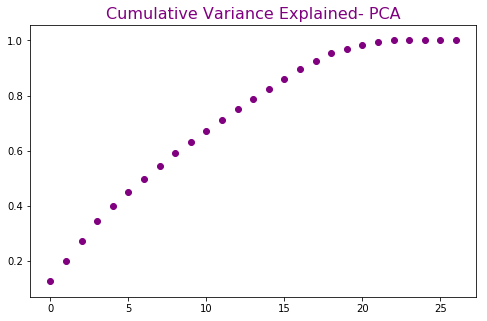

In [72]:
feats = range(0,27)
fig, ax1 = plt.subplots(figsize=(8,5))
ax1 = plt.subplot(111)
ax1.set_title('Cumulative Variance Explained- PCA', color='purple', fontsize=16)
plt.scatter(feats, exVarPcaCS, color='purple')

In [73]:
print(pca.singular_values_)

[357.79083786 273.20146284 270.81791478 268.19821876 238.69127458
 224.36176486 220.81250905 218.77239707 216.84952253 203.90498638
 201.71661394 198.95633312 197.86517362 197.19943079 191.87528839
 188.49130111 186.2840588  180.35530769 163.54640711 121.94670872
 118.63900265 117.05820711  69.24478562   8.85318459   0.
   0.           0.        ]


In [74]:
pca_X = pca.fit_transform(Xs_train.iloc[:, 0:27])
ind = Xs_train.index
pca_X

array([[ 0.39287595, -1.23204639,  0.15872181, ..., -0.        ,
         0.        ,  0.        ],
       [-0.12466544, -0.13200423,  2.12551433, ..., -0.        ,
         0.        ,  0.        ],
       [-0.7640381 ,  0.10609823, -2.01716898, ..., -0.        ,
         0.        ,  0.        ],
       ...,
       [-0.81537552,  1.10917797, -1.65006015, ..., -0.        ,
         0.        ,  0.        ],
       [-0.78973203,  0.65671   , -1.29415022, ...,  0.        ,
         0.        ,  0.        ],
       [-0.29617406, -1.16015905,  1.96079978, ..., -0.        ,
        -0.        ,  0.        ]])

In [75]:
pca_X.shape

(37754, 27)

In [76]:
pca_df = pd.DataFrame(pca_X, index=ind)
pca_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
15596,0.392876,-1.232046,0.158722,-1.425404,-0.569871,-0.119844,0.075831,1.738204,1.013677,-1.007821,...,-0.871788,-0.122324,-1.305402,0.319275,0.035054,0.531774,0.018632,-2.116444e-16,6.165626e-16,3.870368e-16
38592,-0.124665,-0.132004,2.125514,-0.511002,0.074240,-0.125358,1.978594,-0.856192,-0.387245,-0.284147,...,0.205281,-0.058757,-0.029458,0.407107,-0.267271,-0.068998,-0.006093,-1.020199e-15,4.769927e-15,1.007888e-15
26530,-0.764038,0.106098,-2.017169,0.553607,-0.169185,0.156089,1.865577,-1.823463,0.102611,0.223542,...,1.223725,-0.059617,-0.081299,0.248371,-0.380966,0.065992,0.003436,-4.832433e-15,1.927391e-14,6.699356e-16
40956,0.231816,-1.015944,-1.967554,1.158276,2.211074,-1.391004,0.960321,-0.327313,1.143070,-1.213098,...,-2.416555,0.916039,0.649899,0.387260,-1.720566,0.142017,-0.007133,-1.326629e-15,4.809500e-15,-1.840627e-15
39883,-0.154298,-1.695830,-1.392136,0.461424,0.695196,-1.463292,-0.248268,1.864065,0.465812,-0.433799,...,1.449134,-0.240315,0.290241,-0.004105,-0.304523,0.101976,0.004609,2.559118e-15,-3.002071e-14,-4.864957e-16
12555,-0.037666,-1.838171,-0.421520,0.444362,0.269418,0.003402,-0.768852,0.597875,-1.276933,-0.078567,...,1.012347,-0.103948,1.281712,0.354250,-0.238291,0.118912,0.005944,-1.413928e-14,1.207065e-13,6.122074e-16
15166,-0.791431,0.730290,1.722233,-0.490489,-0.190228,-0.519176,0.999371,0.232588,1.820797,0.309290,...,-1.136112,0.146476,0.415790,0.683897,-1.135061,-0.195532,-0.001009,-1.362775e-14,8.978410e-14,7.184572e-16
32360,-0.709625,1.226386,-1.737287,0.038388,-0.852108,1.503529,1.302514,0.366049,0.365657,1.491463,...,-0.781215,0.068150,0.241691,-0.227111,0.198054,-0.122118,0.001272,-6.370582e-16,7.072248e-18,-5.764937e-16
18240,-0.860215,1.186100,-1.668402,0.168373,-0.774074,1.584891,1.343606,0.452653,0.262528,1.582711,...,-1.033829,0.149199,0.239913,-0.237652,0.182315,-0.118243,-0.000350,-2.184673e-15,-2.224957e-16,-4.746417e-16
15316,0.922711,-0.210470,-1.841123,1.685885,0.545082,0.723660,1.892220,-1.738017,0.164594,0.358387,...,1.525683,-0.441140,-0.269591,-0.682234,-0.998421,0.062887,-0.001394,3.008664e-15,2.200317e-16,1.167222e-15


In [77]:
pca_df = pca_df.rename({0:'first_prin_comp', 1:'second_prin_comp', 2:'third_prin_comp', 3:'fourth_prin_comp', \
                       4:'fifth_prin_comp', 5:'sixth_prin_comp', 6:'seventh_prin_comp', 7:'eighth_prin_comp', \
                       8:'ninth_prin_comp', 9:'tenth_prin_comp', 10:'eleventh_prin_comp', 11:'twelth_prin_comp', \
                       12:'thirteenth_prin_comp', 13:'fourteenth_prin_comp', 14:'fifteenth_prin_comp', 15:'sixteenth_prin_comp', \
                       16:'seventeenth_prin_comp', 17:'eighteenth_prin_comp', 18:'ninteenth_prin_comp', 19:'twentieth_prin_comp', \
                       20:'twenty-first_prin_comp', 21:'twenty-second_prin_comp', 22:'twenty-third_prin_comp', \
                       23:'twenty-fourth_prin_comp', 24:'twenty-fifth_prin_comp', 25:'twenty-sixth_prin_comp', \
                       26:'twenty-seventh_prin_comp'}, axis=1)

### PCA colored by KMeans Cluster.

(-5.0, 10.0)

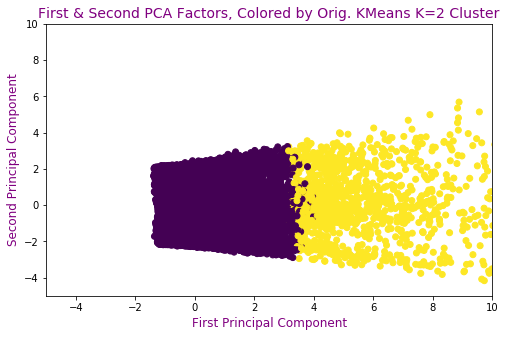

In [78]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1 = plt.subplot(111)
ax1.set_title('First & Second PCA Factors, Colored by Orig. KMeans K=2 Cluster', color='purple', fontsize=14)
plt.xlabel('First Principal Component', color='purple', fontsize=12)
plt.ylabel('Second Principal Component', color='purple', fontsize=12)
plt.scatter(pca_df['first_prin_comp'], pca_df['second_prin_comp'], c=Xs_train['KM_2clust'])
plt.ylim(-5.00,10.00)
plt.xlim(-5.00,10.00)

(-5.0, 10.0)

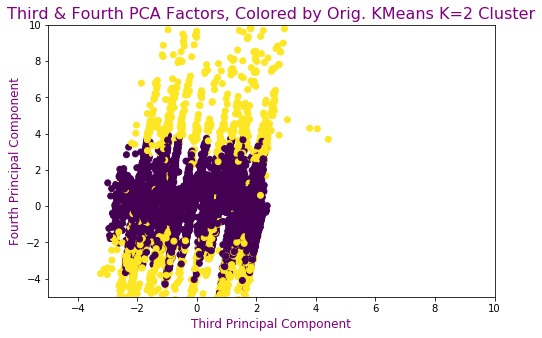

In [79]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1 = plt.subplot(111)
ax1.set_title('Third & Fourth PCA Factors, Colored by Orig. KMeans K=2 Cluster', color='purple', fontsize=16)
plt.xlabel('Third Principal Component', color='purple', fontsize=12)
plt.ylabel('Fourth Principal Component', color='purple', fontsize=12)
plt.scatter(pca_df['third_prin_comp'], pca_df['fourth_prin_comp'], c=Xs_train['KM_2clust'])
plt.ylim(-5.00,10.00)
plt.xlim(-5.00,10.00)

(-5.0, 10.0)

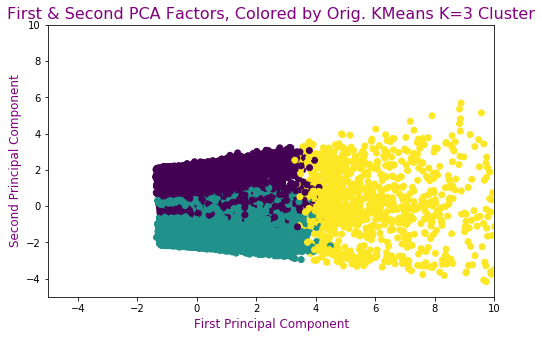

In [80]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1 = plt.subplot(111)
ax1.set_title('First & Second PCA Factors, Colored by Orig. KMeans K=3 Cluster', color='purple', fontsize=16)
plt.xlabel('First Principal Component', color='purple', fontsize=12)
plt.ylabel('Second Principal Component', color='purple', fontsize=12)
ax1.scatter(pca_df['first_prin_comp'], pca_df['second_prin_comp'], c=Xs_train['KM_3clust'])
plt.ylim(-5.00,10.00)
plt.xlim(-5.00,10.00)

(-5.0, 10.0)

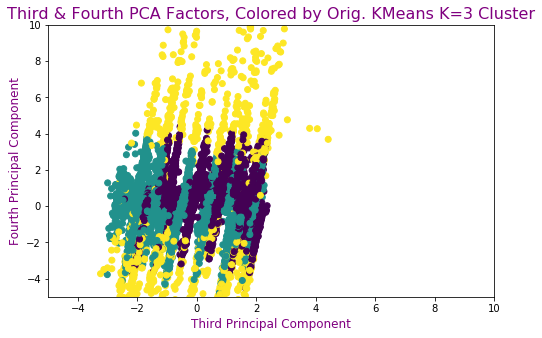

In [162]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1 = plt.subplot(111)
ax1.set_title('Third & Fourth PCA Factors, Colored by Orig. KMeans K=3 Cluster', color='purple', fontsize=16)
plt.xlabel('Third Principal Component', color='purple', fontsize=12)
plt.ylabel('Fourth Principal Component', color='purple', fontsize=12)
plt.scatter(pca_df['third_prin_comp'], pca_df['fourth_prin_comp'], c=Xs_train['KM_3clust'])
plt.ylim(-5.00,10.00)
plt.xlim(-5.00,10.00)

### PCA colored by EM Cluster.

(-5.0, 10.0)

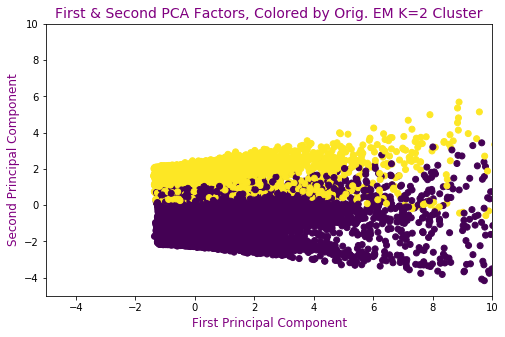

In [82]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1 = plt.subplot(111)
ax1.set_title('First & Second PCA Factors, Colored by Orig. EM K=2 Cluster', color='purple', fontsize=14)
plt.xlabel('First Principal Component', color='purple', fontsize=12)
plt.ylabel('Second Principal Component', color='purple', fontsize=12)
plt.scatter(pca_df['first_prin_comp'], pca_df['second_prin_comp'], c=Xs_train['EM_2clust'])
plt.ylim(-5.00,10.00)
plt.xlim(-5.00,10.00)

(-5.0, 10.0)

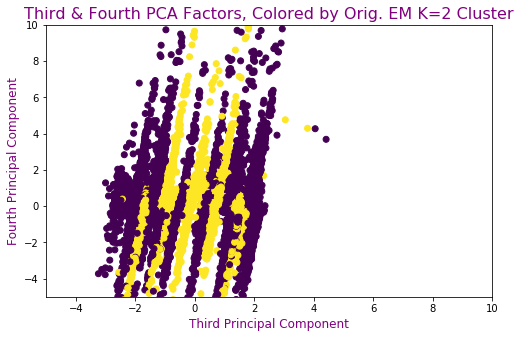

In [83]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1 = plt.subplot(111)
ax1.set_title('Third & Fourth PCA Factors, Colored by Orig. EM K=2 Cluster', color='purple', fontsize=16)
plt.xlabel('Third Principal Component', color='purple', fontsize=12)
plt.ylabel('Fourth Principal Component', color='purple', fontsize=12)
plt.scatter(pca_df['third_prin_comp'], pca_df['fourth_prin_comp'], c=Xs_train['EM_2clust'])
plt.ylim(-5.00,10.00)
plt.xlim(-5.00,10.00)

(-5.0, 10.0)

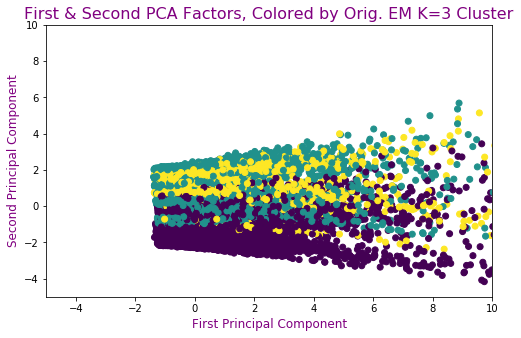

In [84]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1 = plt.subplot(111)
ax1.set_title('First & Second PCA Factors, Colored by Orig. EM K=3 Cluster', color='purple', fontsize=16)
plt.xlabel('First Principal Component', color='purple', fontsize=12)
plt.ylabel('Second Principal Component', color='purple', fontsize=12)
ax1.scatter(pca_df['first_prin_comp'], pca_df['second_prin_comp'], c=Xs_train['EM_3clust'])
plt.ylim(-5.00,10.00)
plt.xlim(-5.00,10.00)

(-5.0, 10.0)

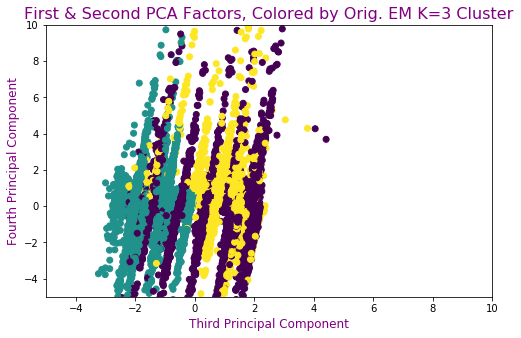

In [85]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1 = plt.subplot(111)
ax1.set_title('First & Second PCA Factors, Colored by Orig. EM K=3 Cluster', color='purple', fontsize=16)
plt.xlabel('Third Principal Component', color='purple', fontsize=12)
plt.ylabel('Fourth Principal Component', color='purple', fontsize=12)
plt.scatter(pca_df['third_prin_comp'], pca_df['fourth_prin_comp'], c=Xs_train['EM_3clust'])
plt.ylim(-5.00,10.00)
plt.xlim(-5.00,10.00)

## ICA.

In [86]:
#%%time

ica = FastICA(tol=0.1, max_iter=100000, random_state=9425)
ica.fit(Xs_train.iloc[:, 0:27])

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=100000,
    n_components=None, random_state=9425, tol=0.1, w_init=None,
    whiten=True)

In [87]:
ica_X = ica.fit_transform(Xs_train.iloc[:, 0:27])
ica_X

array([[-0.00577596, -0.00758302, -0.00564251, ..., -0.0003095 ,
         0.00765143,  0.00867456],
       [ 0.00395915, -0.00501955,  0.00458088, ..., -0.0003095 ,
         0.00630866, -0.00113684],
       [ 0.00225016,  0.00776732,  0.00308552, ...,  0.00042292,
         0.00185309, -0.0002976 ],
       ...,
       [ 0.00093297,  0.00760451,  0.00384238, ..., -0.00010335,
         0.00537515, -0.00097896],
       [-0.00086263, -0.00651491,  0.00278034, ...,  0.00188776,
        -0.00919427, -0.00057989],
       [ 0.00286052,  0.00596678,  0.00503864, ..., -0.0001264 ,
         0.00569831, -0.00064856]])

Having trouble getting this to converge. Tried tol @ default of .0001, .001, and .01. Tried max iterations of 200, 400, and 1000.

In [88]:
ica_df = pd.DataFrame(ica_X, index=ind)
ica_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
15596,-0.005776,-0.007583,-0.005643,0.003601,0.000585,-0.000198,0.006666,0.007314,-0.001008,-0.006113,...,0.009121,0.000675,-0.005227,-0.000552,0.002132,-0.001163,-0.004169,-0.000310,0.007651,0.008675
38592,0.003959,-0.005020,0.004581,-0.000855,0.000829,0.001511,-0.004472,-0.005748,-0.001225,0.006644,...,-0.008030,0.000736,-0.002297,-0.000552,-0.001408,-0.000995,0.003400,-0.000310,0.006309,-0.001137
26530,0.002250,0.007767,0.003086,0.000106,0.000768,-0.000568,-0.001344,0.005849,-0.003617,-0.005136,...,-0.006535,0.000416,-0.007546,-0.001651,-0.006474,-0.000583,0.008008,0.000423,0.001853,-0.000298
40956,-0.009621,0.009507,-0.005215,-0.000428,0.000585,0.002732,-0.007799,0.011220,-0.003045,-0.005014,...,-0.007725,-0.031491,0.002586,-0.000308,0.002742,-0.000736,0.007306,0.000179,0.003257,0.000305
39883,0.005821,-0.003311,-0.007687,-0.000184,-0.001368,-0.001006,-0.003618,-0.005137,0.000526,-0.004526,...,0.006923,0.001041,-0.003762,-0.000796,0.006404,-0.001499,0.004498,0.001033,-0.007119,-0.000618
12555,0.003715,0.007004,-0.006161,-0.000184,0.000829,0.002762,-0.006792,-0.003306,-0.000104,0.007376,...,0.006862,0.001407,0.006004,-0.000064,0.002986,-0.001270,0.007428,0.000911,-0.008706,-0.000084
15166,0.003715,0.008408,0.005557,-0.000733,0.000829,-0.001907,-0.006822,-0.004771,0.003276,-0.004098,...,-0.004612,0.000644,-0.002297,-0.001773,-0.010930,-0.001087,0.000348,0.003353,0.007651,-0.002106
32360,-0.003217,0.006384,0.005246,0.000240,0.001467,-0.000208,-0.006463,0.006317,-0.002871,-0.007133,...,-0.006327,0.000505,0.008341,-0.000487,-0.000771,-0.000522,-0.004996,-0.001080,0.004521,-0.001162
18240,-0.000898,0.006628,0.005002,-0.000370,0.001467,-0.000361,-0.006402,0.008026,-0.001925,-0.006401,...,-0.005839,0.000627,0.008341,-0.000242,0.000205,-0.000400,-0.006461,0.000385,0.006169,-0.001101
15316,0.001701,0.010697,0.000461,0.000106,-0.007044,-0.005176,0.000243,0.007314,0.001853,-0.002695,...,-0.007267,0.000110,-0.008034,0.000547,-0.004521,-0.000339,0.007031,0.001705,0.005454,0.000252


In [89]:
ica_df.abs().sum()
## look at 6 and 9

0     144.372672
1     237.518825
2     191.207175
3      46.677965
4      36.924605
5      79.096210
6     182.213695
7     192.882257
8      92.462181
9     217.073103
10     14.501108
11     28.093603
12     79.625253
13    207.167537
14    186.873089
15     78.943326
16    202.361598
17    245.214490
18     60.661150
19    221.358246
20     40.427190
21    186.316087
22     75.540419
23    189.729576
24     60.723363
25    229.735487
26     64.615052
dtype: float64

In [90]:
ica_df.sum()

0    -0.914525
1    -1.835863
2     0.609560
3     1.055371
4     2.822112
5    -0.424775
6     0.285562
7     2.535400
8    -0.083211
9     0.327238
10   -1.026574
11   -3.734164
12    0.499787
13    4.829649
14   -5.967574
15    7.091499
16   -2.243759
17    9.953750
18   -1.111545
19    4.821300
20   -2.693493
21    1.141346
22    0.196551
23   -1.032215
24    2.320160
25   -7.447887
26   -0.126635
dtype: float64

In [91]:
ica_df[[6,9]].head()

,6,9
15596,0.006666,-0.006113
38592,-0.004472,0.006644
26530,-0.001344,-0.005136
40956,-0.007799,-0.005014
39883,-0.003618,-0.004526


In [92]:
len(ica_df)

37754

(-0.05, 0.05)

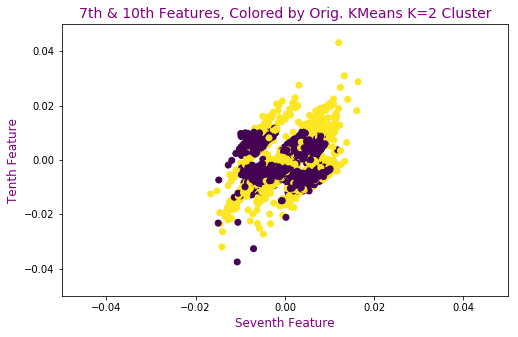

In [93]:
feats = range(0,27)
fig, ax1 = plt.subplots(figsize=(8,5))
ax1 = plt.subplot(111)
ax1.set_title('7th & 10th Features, Colored by Orig. KMeans K=2 Cluster', color='purple', fontsize=14)
plt.xlabel('Seventh Feature', color='purple', fontsize=12)
plt.ylabel('Tenth Feature', color='purple', fontsize=12)
plt.scatter(ica_df[6], ica_df[9], c=Xs_train['KM_2clust'])
plt.ylim(-0.0500,0.0500)
plt.xlim(-0.0500,0.0500)

(-0.05, 0.05)

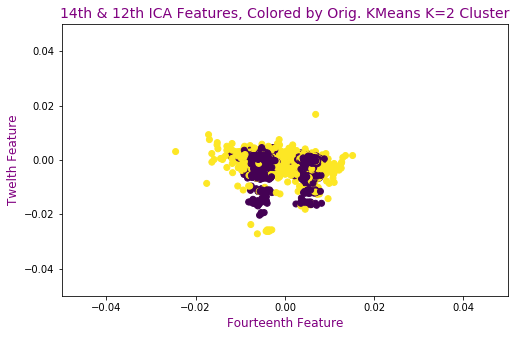

In [163]:
feats = range(0,27)
fig, ax1 = plt.subplots(figsize=(8,5))
ax1 = plt.subplot(111)
ax1.set_title('14th & 12th ICA Features, Colored by Orig. KMeans K=2 Cluster', color='purple', fontsize=14)
plt.xlabel('Fourteenth Feature', color='purple', fontsize=12)
plt.ylabel('Twelth Feature', color='purple', fontsize=12)
plt.scatter(ica_df[13], ica_df[11], c=Xs_train['KM_2clust'])
plt.ylim(-0.0500,0.0500)
plt.xlim(-0.0500,0.0500)

## Random Projections.

In [95]:
# transformer = random_projection.GaussianRandomProjection()
# X_new = transformer.fit_transform(X)
grp = GaussianRandomProjection(n_components=27, random_state=9425)
grp_X = grp.fit_transform(Xs_train.iloc[:, 0:27])
grp_X.shape

(37754, 27)

In [96]:
grp_df = pd.DataFrame(grp_X, index=ind)
grp_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
15596,-1.087827,0.111727,0.404837,0.210330,0.370776,-0.265223,0.854271,-0.600715,0.443993,-0.408272,...,0.256799,-0.874458,1.251118,0.400942,-0.079812,1.828805,1.363556,0.542144,-0.089018,-0.182600
38592,-0.301605,-0.365801,0.012684,0.985729,-0.276598,0.405762,0.752940,0.177834,1.345958,0.100071,...,-0.341642,-0.963372,1.092431,0.371699,-0.989833,-2.474029,-0.140803,0.655308,0.762589,0.964329
26530,-0.212688,0.874678,-0.823464,-0.326413,-0.226694,1.364037,0.817583,-0.427163,-0.129890,0.207424,...,0.097828,2.117205,-0.663638,0.574121,2.039086,0.266341,0.410516,0.250923,-0.192279,-0.264513
40956,-0.723937,-1.947399,0.719008,-1.796394,-0.220811,-1.312715,0.800164,-1.734665,0.834781,-0.410313,...,2.080809,0.339373,1.954783,1.976018,1.304113,0.187967,2.428502,-0.010052,-1.419436,-1.658425
39883,-0.391338,-0.732702,0.789596,0.153719,0.736214,1.546961,1.043415,-0.562043,0.049732,0.791598,...,-0.930253,0.301476,-0.611540,-0.007796,0.898633,-1.387715,0.274904,-0.931108,-0.728716,0.246378
12555,0.268723,-0.701152,1.019934,-0.118476,-0.195262,1.517469,-0.111590,0.107698,-0.510187,0.400916,...,-0.632642,0.875177,-1.526550,-0.723089,0.260178,-1.517670,-0.470386,-0.985893,-0.665898,0.822150
15166,-1.460518,-0.903264,0.189287,0.517160,0.191511,0.166724,0.320744,0.383680,-1.322415,-0.784417,...,0.634907,-1.436399,1.603865,0.408200,-0.236889,-0.436413,-0.134859,-0.099552,1.838563,1.392953
32360,0.571322,-0.529972,-0.039179,-0.106082,-0.885274,-0.648859,-0.719310,-1.120301,-0.532149,-1.136736,...,-0.417912,1.771415,-1.473535,0.824729,0.932780,0.991830,1.343395,-0.015328,-0.011340,0.377967
18240,0.486466,-0.592351,-0.410701,-0.159723,-1.089867,-0.535304,-0.516161,-1.154914,-0.021245,-1.260241,...,-0.595097,1.705172,-1.005795,0.802200,0.630684,0.815999,1.037350,-0.249309,0.304305,0.035480
15316,-0.114621,0.905067,-0.761412,-0.959763,-0.272069,0.441983,0.903696,0.888133,-0.025220,0.590693,...,0.212632,2.430787,-0.287852,0.193333,1.214101,0.247114,0.142013,0.446667,0.760911,-1.054136


In [97]:
grp_df.abs().sum()

0     27692.418901
1     32823.592266
2     19570.451996
3     17747.062779
4     23155.332460
5     35101.291523
6     25980.553575
7     37593.860814
8     26021.138566
9     17191.132580
10    19370.614922
11    22803.600246
12    26737.755880
13    22085.748637
14    27501.092960
15    19713.575057
16    23046.513623
17    29690.757032
18    30545.345839
19    36182.761468
20    25715.949683
21    27196.491221
22    31863.108972
23    26901.825638
24    18667.611600
25    26560.901731
26    26516.231253
dtype: float64

In [98]:
grp_df.sum()

0     -51.641547
1       7.621514
2       3.506917
3     -18.812149
4     -96.756869
5      43.851396
6      -3.631596
7      60.498689
8     -70.440161
9      31.382962
10    -32.582277
11     -8.663042
12    -24.788642
13    -38.395116
14    -92.891140
15     12.233113
16    -82.654990
17    151.938254
18     23.689799
19    -61.795039
20     -6.690598
21     43.036271
22     -4.211126
23     42.930334
24     -3.074262
25     42.040634
26     56.353646
dtype: float64

(-0.1, 0.1)

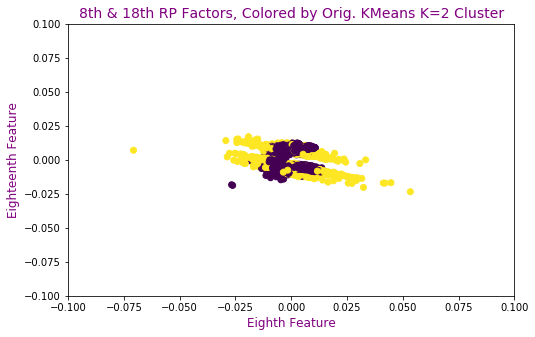

In [164]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1 = plt.subplot(111)
ax1.set_title('8th & 18th RP Factors, Colored by Orig. KMeans K=2 Cluster', color='purple', fontsize=14)
plt.xlabel('Eighth Feature', color='purple', fontsize=12)
plt.ylabel('Eighteenth Feature', color='purple', fontsize=12)
plt.scatter(ica_df[7], ica_df[17], c=Xs_train['KM_2clust'])
plt.ylim(-0.10,0.10)
plt.xlim(-0.10,0.10)

# 3. KMeans Clustering after PCA Dimensionality Reduction.

In [100]:
pca_df.head()

,first_prin_comp,second_prin_comp,third_prin_comp,fourth_prin_comp,fifth_prin_comp,sixth_prin_comp,seventh_prin_comp,eighth_prin_comp,ninth_prin_comp,tenth_prin_comp,...,eighteenth_prin_comp,ninteenth_prin_comp,twentieth_prin_comp,twenty-first_prin_comp,twenty-second_prin_comp,twenty-third_prin_comp,twenty-fourth_prin_comp,twenty-fifth_prin_comp,twenty-sixth_prin_comp,twenty-seventh_prin_comp
15596,0.392876,-1.232046,0.158722,-1.425404,-0.569871,-0.119844,0.075831,1.738204,1.013677,-1.007821,...,-0.871788,-0.122324,-1.305402,0.319275,0.035054,0.531774,0.018632,-2.116444e-16,6.165626e-16,3.870368e-16
38592,-0.124665,-0.132004,2.125514,-0.511002,0.074240,-0.125358,1.978594,-0.856192,-0.387245,-0.284147,...,0.205281,-0.058757,-0.029458,0.407107,-0.267271,-0.068998,-0.006093,-1.020199e-15,4.769927e-15,1.007888e-15
26530,-0.764038,0.106098,-2.017169,0.553607,-0.169185,0.156089,1.865577,-1.823463,0.102611,0.223542,...,1.223725,-0.059617,-0.081299,0.248371,-0.380966,0.065992,0.003436,-4.832433e-15,1.927391e-14,6.699356e-16
40956,0.231816,-1.015944,-1.967554,1.158276,2.211074,-1.391004,0.960321,-0.327313,1.143070,-1.213098,...,-2.416555,0.916039,0.649899,0.387260,-1.720566,0.142017,-0.007133,-1.326629e-15,4.809500e-15,-1.840627e-15
39883,-0.154298,-1.695830,-1.392136,0.461424,0.695196,-1.463292,-0.248268,1.864065,0.465812,-0.433799,...,1.449134,-0.240315,0.290241,-0.004105,-0.304523,0.101976,0.004609,2.559118e-15,-3.002071e-14,-4.864957e-16


In [101]:
Xs_train.head()

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,...,KM_2clust,KM_3clust,KM_4clust,KM_5clust,KM_6clust,EM_2clust,EM_3clust,EM_4clust,EM_5clust,EM_6clust
15596,-0.141154,-0.220202,-0.133185,0.891421,0.741947,-0.229912,0.057644,0.664894,-0.235290,1.576286,...,0,1,2,4,4,0,0,0,2,0
38592,-0.100597,-0.220202,0.159681,-0.761037,-0.173342,-0.241762,0.125793,-0.169184,-0.295030,-0.185969,...,0,0,3,3,0,0,0,0,0,0
26530,-0.198393,-0.220202,-0.362849,-0.360441,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,-0.948025,...,0,1,2,2,3,0,1,1,1,1
40956,0.101916,-0.212882,0.725706,1.642538,-0.215264,0.030784,-0.269467,-0.206420,0.222715,-1.424310,...,0,1,2,4,3,0,2,2,2,2
39883,0.237638,-0.220202,-0.018795,-1.061484,-0.257185,-0.040315,-0.269467,-0.251103,0.162975,-1.281425,...,0,1,2,4,4,0,0,2,2,2


In [102]:
kmeans2t = KMeans(n_clusters=2, random_state=45192).fit(pca_df)
kmeans3t = KMeans(n_clusters=3, random_state=45192).fit(pca_df)
kmeans4t = KMeans(n_clusters=4, random_state=45192).fit(pca_df)
kmeans5t = KMeans(n_clusters=5, random_state=45192).fit(pca_df)
kmeans6t = KMeans(n_clusters=6, random_state=45192).fit(pca_df)

In [103]:
pca_df['KM_2clust'] = kmeans2t.labels_
pca_df['KM_3clust'] = kmeans3t.labels_
pca_df['KM_4clust'] = kmeans4t.labels_
pca_df['KM_5clust'] = kmeans5t.labels_
pca_df['KM_6clust'] = kmeans6t.labels_

K Means with 2 Clusters after PCA.

Text(0.5, 1.0, 'PCA 7 and 8')

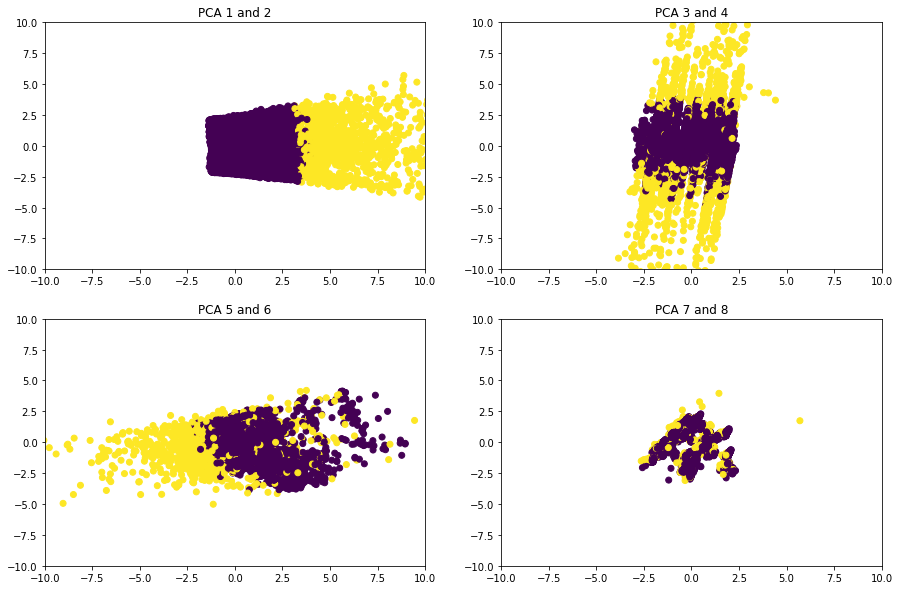

In [104]:
fig, ax1 = plt.subplots(figsize=(15,10))
plt.subplot(221)
plt.scatter(pca_df['first_prin_comp'], pca_df['second_prin_comp'], c=pca_df['KM_2clust'])
plt.ylim(-10.00,10.00)
plt.xlim(-10.00,10.00)
plt.title("PCA 1 and 2")
plt.subplot(222)
plt.scatter(pca_df['third_prin_comp'], pca_df['fourth_prin_comp'], c=pca_df['KM_2clust'])
plt.ylim(-10.00,10.00)
plt.xlim(-10.00,10.00)
plt.title("PCA 3 and 4")
plt.subplot(223)
plt.scatter(pca_df['fifth_prin_comp'], pca_df['sixth_prin_comp'], c=pca_df['KM_2clust'])
plt.ylim(-10.00,10.00)
plt.xlim(-10.00,10.00)
plt.title("PCA 5 and 6")
plt.subplot(224)
plt.scatter(pca_df['seventh_prin_comp'], pca_df['eighth_prin_comp'], c=pca_df['KM_2clust'])
plt.ylim(-10.00,10.00)
plt.xlim(-10.00,10.00)
plt.title("PCA 7 and 8")

K Means with 3 Clusters after PCA.

Text(0.5, 1.0, 'PCA 7 and 8')

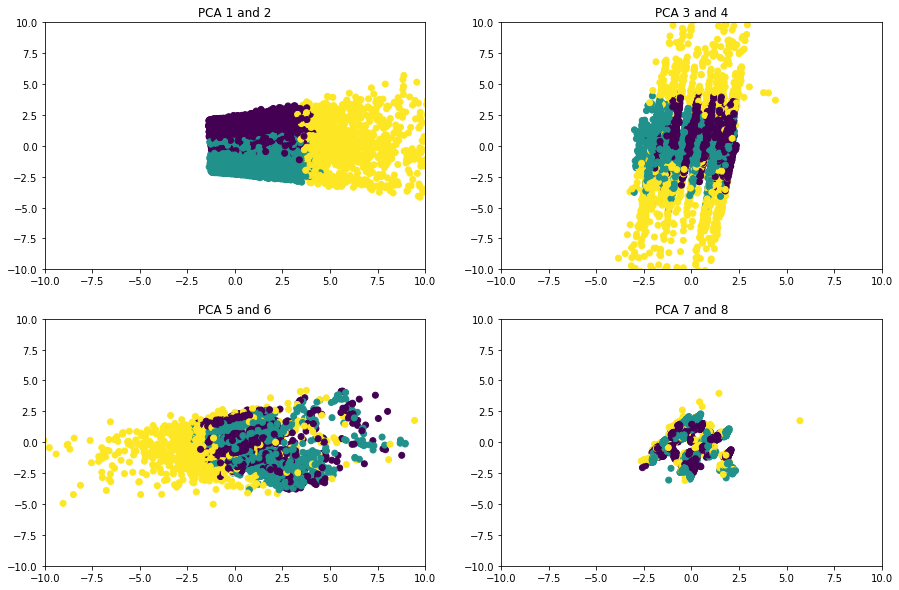

In [105]:
fig, ax1 = plt.subplots(figsize=(15,10))
plt.subplot(221)
plt.scatter(pca_df['first_prin_comp'], pca_df['second_prin_comp'], c=pca_df['KM_3clust'])
plt.ylim(-10.00,10.00)
plt.xlim(-10.00,10.00)
plt.title("PCA 1 and 2")
plt.subplot(222)
plt.scatter(pca_df['third_prin_comp'], pca_df['fourth_prin_comp'], c=pca_df['KM_3clust'])
plt.ylim(-10.00,10.00)
plt.xlim(-10.00,10.00)
plt.title("PCA 3 and 4")
plt.subplot(223)
plt.scatter(pca_df['fifth_prin_comp'], pca_df['sixth_prin_comp'], c=pca_df['KM_3clust'])
plt.ylim(-10.00,10.00)
plt.xlim(-10.00,10.00)
plt.title("PCA 5 and 6")
plt.subplot(224)
plt.scatter(pca_df['seventh_prin_comp'], pca_df['eighth_prin_comp'], c=pca_df['KM_3clust'])
plt.ylim(-10.00,10.00)
plt.xlim(-10.00,10.00)
plt.title("PCA 7 and 8")

# 4. Neural Network Learning after Dimensionality Reduction

In [106]:
h2o.init(ip="localhost", port=54321)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,20 days 22 hours 53 mins
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,"1 year, 1 month and 27 days !!!"
H2O cluster name:,H2O_from_python_katri_ihmucp
H2O cluster total nodes:,1
H2O cluster free memory:,3.204 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


Taking portion of the current dataset (95% of original).

In [107]:
t = Xs_train.merge(pca_df, left_index=True, right_index=True)
t = t.merge(ys_train, left_index=True, right_index=True)
Xs_train_sHF = h2o.H2OFrame(t)
Xs_train_sHF['Comment_Y'] = Xs_train_sHF['Comment_Y'].asfactor()
train, valid, test = Xs_train_sHF.split_frame([0.6, 0.2])

C:\Users\katri\Anaconda3\lib\site-packages\h2o\utils\shared_utils.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [108]:
train.columns

['PagePopularity_1',
 'PageCheckins_2',
 'PageTalkingAbout_3',
 'PageCategory_4',
 'CommentsBeforeBase_30',
 'CommentsLast24h_31',
 'CommentsLast48to24h_32',
 'CommentsFirst24h_33',
 'CommentsDiffFirstSecondDay_34',
 'BaseTime_35',
 'PostLength_36',
 'PostShareCnt_37',
 'HoursReceived_39',
 'SundayPublished_40',
 'MondayPublished_41',
 'TuesdayPublisher_42',
 'WednesdayPublished_43',
 'ThursdayPublished_44',
 'FridayPublished_45',
 'SaturdayPublished_46',
 'SundayBase_47',
 'MondayBase_48',
 'TuesdayBase_49',
 'WednesdayBase_50',
 'ThursdayBase_51',
 'FridayBase_52',
 'SaturdayBase_53',
 'KM_2clust_x',
 'KM_3clust_x',
 'KM_4clust_x',
 'KM_5clust_x',
 'KM_6clust_x',
 'EM_2clust',
 'EM_3clust',
 'EM_4clust',
 'EM_5clust',
 'EM_6clust',
 'first_prin_comp',
 'second_prin_comp',
 'third_prin_comp',
 'fourth_prin_comp',
 'fifth_prin_comp',
 'sixth_prin_comp',
 'seventh_prin_comp',
 'eighth_prin_comp',
 'ninth_prin_comp',
 'tenth_prin_comp',
 'eleventh_prin_comp',
 'twelth_prin_comp',
 'thirt

In [109]:
x = ['PagePopularity_1', 'PageCheckins_2', 'PageTalkingAbout_3',
       'PageCategory_4', 'CommentsBeforeBase_30', 'CommentsLast24h_31',
       'CommentsLast48to24h_32', 'CommentsFirst24h_33',
       'CommentsDiffFirstSecondDay_34', 'BaseTime_35', 'PostLength_36',
       'PostShareCnt_37', 'HoursReceived_39', 'SundayPublished_40',
       'MondayPublished_41', 'TuesdayPublisher_42', 'WednesdayPublished_43',
       'ThursdayPublished_44', 'FridayPublished_45', 'SaturdayPublished_46',
       'SundayBase_47', 'MondayBase_48', 'TuesdayBase_49', 'WednesdayBase_50',
       'ThursdayBase_51', 'FridayBase_52', 'SaturdayBase_53']
y = 'Comment_Y'

In [110]:
#%%time

DLbaseModel = h2o.estimators.H2ODeepLearningEstimator(model_id="DL_defaults")
DLbaseModel.train(x, y, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [111]:
print(DLbaseModel)

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DL_defaults


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.1216639977732407
RMSE: 0.348803666513471
LogLoss: 0.38713361078681763
Mean Per-Class Error: 0.17047492177542323
AUC: 0.9060122064951007
Gini: 0.8120244129902014
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4104261519927601: 


,0,1,Error,Rate
0,4679.0,779.0,0.1427,(779.0/5458.0)
1,915.0,3701.0,0.1982,(915.0/4616.0)
Total,5594.0,4480.0,0.1682,(1694.0/10074.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4104262,0.8137643,212.0
max f2,0.1307460,0.8623238,323.0
max f0point5,0.6485434,0.8459740,133.0
max accuracy,0.4571550,0.8336311,196.0
max precision,0.9818716,0.9981025,13.0
max recall,0.0129037,1.0,397.0
max specificity,0.9998583,0.9996336,0.0
max absolute_mcc,0.4571550,0.6648144,196.0
max min_per_class_accuracy,0.3588519,0.8258232,229.0
max mean_per_class_accuracy,0.4104262,0.8295251,212.0


Gains/Lift Table: Avg response rate: 45.82 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100258,0.9999856,2.1608010,2.1608010,0.9900990,0.9900990,0.0216638,0.0216638,116.0801002,116.0801002
,2,0.0200516,0.9996763,2.1608010,2.1608010,0.9900990,0.9900990,0.0216638,0.0433276,116.0801002,116.0801002
,3,0.0300774,0.9987679,2.1824090,2.1680037,1.0,0.9933993,0.0218804,0.0652080,118.2409012,116.8003672
,4,0.0400040,0.9972397,2.1824090,2.1715782,1.0,0.9950372,0.0216638,0.0868718,118.2409012,117.1578198
,5,0.0500298,0.9953935,2.1824090,2.1737487,1.0,0.9960317,0.0218804,0.1087522,118.2409012,117.3748659
,6,0.1000596,0.9824878,2.1824090,2.1780788,1.0,0.9980159,0.1091854,0.2179376,118.2409012,117.8078836
,7,0.1499901,0.9506068,2.1303436,2.1621881,0.9761431,0.9907346,0.1063692,0.3243068,113.0343588,116.2188148
,8,0.2000199,0.8822149,2.0395132,2.1315042,0.9345238,0.9766749,0.1020364,0.4263432,103.9513184,113.1504187
,9,0.2999801,0.6921067,1.8378181,2.0336412,0.8421053,0.9318332,0.1837088,0.6100520,83.7818115,103.3641224
,10,0.4000397,0.4935700,1.4267932,1.8818539,0.6537698,0.8622829,0.1427643,0.7528163,42.6793193,88.1853925



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2019-05-05 15:07:46,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan
,2019-05-05 15:07:51,5.152 sec,4814 obs/sec,1.0,1,22538.0,0.3994043,0.5267881,0.8858277,2.1608010,0.1957514
,2019-05-05 15:07:56,10.734 sec,6752 obs/sec,3.0,3,67614.0,0.3569013,0.4011891,0.8968141,2.1391930,0.1813580
,2019-05-05 15:08:02,16.634 sec,8634 obs/sec,6.0,6,135228.0,0.3533532,0.3950489,0.9009105,2.1391930,0.1843359
,2019-05-05 15:08:08,22.181 sec,9669 obs/sec,9.0,9,202842.0,0.3520242,0.3954731,0.9045910,2.1608010,0.1781815
,2019-05-05 15:08:10,24.193 sec,9929 obs/sec,10.0,10,225380.0,0.3488037,0.3871336,0.9060122,2.1608010,0.1681556


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
CommentsLast24h_31,1.0,1.0,0.1063126
MondayPublished_41,0.3980451,0.3980451,0.0423172
WednesdayPublished_43,0.3977381,0.3977381,0.0422846
WednesdayBase_50,0.3937069,0.3937069,0.0418560
CommentsLast48to24h_32,0.3901835,0.3901835,0.0414814
---,---,---,---
PageCheckins_2,0.1866922,0.1866922,0.0198477
PageTalkingAbout_3,0.1733007,0.1733007,0.0184240
PageCategory_4,0.1592826,0.1592826,0.0169337
HoursReceived_39,0.1392435,0.1392435,0.0148033



See the whole table with table.as_data_frame()



In [112]:
x_p = ['first_prin_comp', 'second_prin_comp', 'third_prin_comp', 'fourth_prin_comp', 'fifth_prin_comp',
 'sixth_prin_comp', 'seventh_prin_comp', 'eighth_prin_comp', 'ninth_prin_comp', 'tenth_prin_comp',
 'eleventh_prin_comp', 'twelth_prin_comp', 'thirteenth_prin_comp', 'fourteenth_prin_comp', 'fifteenth_prin_comp',
 'sixteenth_prin_comp', 'seventeenth_prin_comp', 'eighteenth_prin_comp', 'ninteenth_prin_comp', 'twentieth_prin_comp',
 'twenty-first_prin_comp', 'twenty-second_prin_comp', 'twenty-third_prin_comp', 'twenty-fourth_prin_comp',
 'twenty-fifth_prin_comp','twenty-sixth_prin_comp','twenty-seventh_prin_comp']
y_p = 'Comment_Y'

In [113]:
#%%time

DLbaseModel_pca = h2o.estimators.H2ODeepLearningEstimator(model_id="DL_defaults_pca")
DLbaseModel_pca.train(x_p, y_p, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [114]:
print(DLbaseModel_pca)

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DL_defaults_pca


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.11824590089199342
RMSE: 0.3438690170573578
LogLoss: 0.37210386254417716
Mean Per-Class Error: 0.16890363815142573
AUC: 0.9097531956735496
Gini: 0.8195063913470992
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4096897740035668: 


,0,1,Error,Rate
0,4529.0,871.0,0.1613,(871.0/5400.0)
1,798.0,3722.0,0.1765,(798.0/4520.0)
Total,5327.0,4593.0,0.1682,(1669.0/9920.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4096898,0.8168550,217.0
max f2,0.1364991,0.8647602,322.0
max f0point5,0.6612361,0.8502841,130.0
max accuracy,0.4883165,0.834375,189.0
max precision,0.9998561,1.0,0.0
max recall,0.0179600,1.0,393.0
max specificity,0.9998561,1.0,0.0
max absolute_mcc,0.4883165,0.6656377,189.0
max min_per_class_accuracy,0.3949105,0.8292035,222.0
max mean_per_class_accuracy,0.4439131,0.8310964,205.0


Gains/Lift Table: Avg response rate: 45.56 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100806,0.9996446,2.1946903,2.1946903,1.0,1.0,0.0221239,0.0221239,119.4690265,119.4690265
,2,0.0200605,0.9987987,2.1946903,2.1946903,1.0,1.0,0.0219027,0.0440265,119.4690265,119.4690265
,3,0.0300403,0.9979292,2.1946903,2.1946903,1.0,1.0,0.0219027,0.0659292,119.4690265,119.4690265
,4,0.0400202,0.9968944,2.1946903,2.1946903,1.0,1.0,0.0219027,0.0878319,119.4690265,119.4690265
,5,0.05,0.9959644,2.1946903,2.1946903,1.0,1.0,0.0219027,0.1097345,119.4690265,119.4690265
,6,0.1,0.9861513,2.1902655,2.1924779,0.9979839,0.9989919,0.1095133,0.2192478,119.0265487,119.2477876
,7,0.15,0.9554691,2.1592920,2.1814159,0.9838710,0.9939516,0.1079646,0.3272124,115.9292035,118.1415929
,8,0.2,0.8934055,2.0884956,2.1581858,0.9516129,0.9833669,0.1044248,0.4316372,108.8495575,115.8185841
,9,0.3,0.7121293,1.8318584,2.0494100,0.8346774,0.9338038,0.1831858,0.6148230,83.1858407,104.9410029
,10,0.4,0.5299048,1.3761062,1.8810841,0.6270161,0.8571069,0.1376106,0.7524336,37.6106195,88.1084071



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2019-05-05 15:08:11,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan
,2019-05-05 15:08:16,5.094 sec,4759 obs/sec,1.0,1,22538.0,0.4226880,0.5689442,0.8808998,2.1946903,0.2014113
,2019-05-05 15:08:21,10.180 sec,7074 obs/sec,3.0,3,67614.0,0.3541816,0.3926472,0.8993168,2.1946903,0.1842742
,2019-05-05 15:08:27,16.654 sec,8566 obs/sec,6.0,6,135228.0,0.3487370,0.3805553,0.9048655,2.1946903,0.1709677
,2019-05-05 15:08:36,26.026 sec,8214 obs/sec,9.0,9,202842.0,0.3492102,0.3842992,0.9080818,2.1946903,0.1689516
,2019-05-05 15:08:39,28.194 sec,8460 obs/sec,10.0,10,225380.0,0.3438690,0.3721039,0.9097532,2.1946903,0.1682460


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
first_prin_comp,1.0,1.0,0.1996078
twenty-sixth_prin_comp,0.3207518,0.3207518,0.0640246
fourth_prin_comp,0.3012055,0.3012055,0.0601230
twenty-fourth_prin_comp,0.2446840,0.2446840,0.0488408
fifth_prin_comp,0.2422423,0.2422423,0.0483534
---,---,---,---
third_prin_comp,0.0932368,0.0932368,0.0186108
seventh_prin_comp,0.0891844,0.0891844,0.0178019
eighth_prin_comp,0.0868492,0.0868492,0.0173358
twelth_prin_comp,0.0852155,0.0852155,0.0170097



See the whole table with table.as_data_frame()



In [170]:
1-.1874

0.8126

In [166]:
x_pf = ['first_prin_comp', 'second_prin_comp', 'third_prin_comp', 'fourth_prin_comp', 'fifth_prin_comp',
 'sixth_prin_comp', 'seventh_prin_comp', 'eighth_prin_comp', 'ninth_prin_comp', 'tenth_prin_comp',
 'eleventh_prin_comp', 'twelth_prin_comp', 'thirteenth_prin_comp']
y_pf = 'Comment_Y'

In [167]:
DLbaseModel_pcaf = h2o.estimators.H2ODeepLearningEstimator(model_id="DL_defaults_pca_fewer")
DLbaseModel_pcaf.train(x_pf, y_pf, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [168]:
print(DLbaseModel_pcaf)

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DL_defaults_pca_fewer


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.13140822718991266
RMSE: 0.36250272714824183
LogLoss: 0.4111393434166188
Mean Per-Class Error: 0.1893201497031216
AUC: 0.8898669442600444
Gini: 0.7797338885200888
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4530127260292137: 


,0,1,Error,Rate
0,4550.0,917.0,0.1677,(917.0/5467.0)
1,941.0,3509.0,0.2115,(941.0/4450.0)
Total,5491.0,4426.0,0.1874,(1858.0/9917.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4530127,0.7906715,207.0
max f2,0.1405268,0.8517159,330.0
max f0point5,0.6473880,0.8230262,138.0
max accuracy,0.4992209,0.8144600,191.0
max precision,0.9922241,0.9975845,5.0
max recall,0.0170048,1.0,399.0
max specificity,0.9998324,0.9998171,0.0
max absolute_mcc,0.4992209,0.6237924,191.0
max min_per_class_accuracy,0.4170492,0.8068410,219.0
max mean_per_class_accuracy,0.4582528,0.8106799,205.0


Gains/Lift Table: Avg response rate: 44.87 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100837,0.9991957,2.2062539,2.2062539,0.99,0.99,0.0222472,0.0222472,120.6253933,120.6253933
,2,0.0200666,0.9970483,2.2285393,2.2173406,1.0,0.9949749,0.0222472,0.0444944,122.8539326,121.7340636
,3,0.0300494,0.9944738,2.2285393,2.2210610,1.0,0.9966443,0.0222472,0.0667416,122.8539326,122.1061006
,4,0.0400323,0.9920003,2.2285393,2.2229259,1.0,0.9974811,0.0222472,0.0889888,122.8539326,122.2925877
,5,0.0500151,0.9889700,2.2060288,2.2195533,0.9898990,0.9959677,0.0220225,0.1110112,120.6028828,121.9553280
,6,0.1000303,0.9649387,2.2015812,2.2105672,0.9879032,0.9919355,0.1101124,0.2211236,120.1581189,121.0567235
,7,0.1500454,0.9132542,2.1251998,2.1821114,0.9536290,0.9791667,0.1062921,0.3274157,112.5199801,118.2111423
,8,0.2000605,0.8404737,1.9544649,2.1251998,0.8770161,0.9536290,0.0977528,0.4251685,95.4464933,112.5199801
,9,0.2999899,0.6854249,1.7832812,2.0113036,0.8002018,0.9025210,0.1782022,0.6033708,78.3281216,101.1303560
,10,0.4000202,0.5268738,1.3434138,1.8442890,0.6028226,0.8275775,0.1343820,0.7377528,34.3413827,84.4289036



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2019-05-05 21:42:50,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan
,2019-05-05 21:42:54,4.731 sec,5473 obs/sec,1.0,1,22538.0,0.4432343,0.6116980,0.8642174,2.2062539,0.2119593
,2019-05-05 21:43:01,11.107 sec,8762 obs/sec,4.0,4,90152.0,0.3694257,0.4243372,0.8819717,2.2062539,0.2096400
,2019-05-05 21:43:06,16.461 sec,11673 obs/sec,8.0,8,180304.0,0.3649796,0.4160070,0.8867729,2.2062539,0.1908843
,2019-05-05 21:43:09,18.854 sec,12775 obs/sec,10.0,10,225380.0,0.3625027,0.4111393,0.8898669,2.2062539,0.1873550


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
first_prin_comp,1.0,1.0,0.2756016
fourth_prin_comp,0.7333757,0.7333757,0.2021195
fifth_prin_comp,0.4020238,0.4020238,0.1107984
second_prin_comp,0.2601387,0.2601387,0.0716946
sixth_prin_comp,0.1899406,0.1899406,0.0523479
thirteenth_prin_comp,0.1664541,0.1664541,0.0458750
third_prin_comp,0.1468551,0.1468551,0.0404735
tenth_prin_comp,0.1271983,0.1271983,0.0350560
twelth_prin_comp,0.1243113,0.1243113,0.0342604
eleventh_prin_comp,0.1230642,0.1230642,0.0339167


# 5. Neural Network Learning after Clustering.

In [115]:
x_c = [ 'KM_2clust_x', 'KM_3clust_x', 'KM_4clust_x', 'KM_5clust_x', 'KM_6clust_x',]
y_c = 'Comment_Y'

In [171]:
#%%time

DLbaseModel_c = h2o.estimators.H2ODeepLearningEstimator(model_id="DL_defaults_clustering")
DLbaseModel_c.train(x_c, y_c, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [172]:
print(DLbaseModel_c)

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DL_defaults_clustering


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.21909008403895233
RMSE: 0.4680705972809575
LogLoss: 0.6263815103887462
Mean Per-Class Error: 0.3700503738849239
AUC: 0.6891940298388084
Gini: 0.3783880596776168
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39272431112646444: 


,0,1,Error,Rate
0,1613.0,3797.0,0.7018,(3797.0/5410.0)
1,492.0,4130.0,0.1064,(492.0/4622.0)
Total,2105.0,7927.0,0.4275,(4289.0/10032.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3927243,0.6582198,44.0
max f2,0.1918893,0.8103086,50.0
max f0point5,0.5045326,0.6038712,40.0
max accuracy,0.5045326,0.6386563,40.0
max precision,0.9909442,1.0,0.0
max recall,0.1918893,1.0,50.0
max specificity,0.9909442,1.0,0.0
max absolute_mcc,0.6456304,0.2815395,38.0
max min_per_class_accuracy,0.4698172,0.6007394,42.0
max mean_per_class_accuracy,0.4796814,0.6299496,41.0


Gains/Lift Table: Avg response rate: 46.07 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0252193,0.9882731,2.1018569,2.1018569,0.9683794,0.9683794,0.0530074,0.0530074,110.1856904,110.1856904
,2,0.0304027,0.9776359,2.0452684,2.0922090,0.9423077,0.9639344,0.0106015,0.0636088,104.5268449,109.2209036
,3,0.0559211,0.8137487,1.7804792,1.9499580,0.8203125,0.8983957,0.0454349,0.1090437,78.0479230,94.9958001
,4,0.1200159,0.7181809,1.6607785,1.7955208,0.7651633,0.8272425,0.1064474,0.2154911,66.0778493,79.5520772
,5,0.1856061,0.6864221,1.3359393,1.6331123,0.6155015,0.7524168,0.0876244,0.3031155,33.5939257,63.3112267
,6,0.2326555,0.6009610,1.2094038,1.5474266,0.5572034,0.7129392,0.0569018,0.3600173,20.9403809,54.7426581
,7,0.3521730,0.5045326,1.0879599,1.3914966,0.5012510,0.6410982,0.1300303,0.4900476,8.7959857,39.1496606
,8,0.4195574,0.4796814,1.0338720,1.3340591,0.4763314,0.6146353,0.0696668,0.5597144,3.3871963,33.4059148
,9,0.5126595,0.4698172,0.9202501,1.2589089,0.4239829,0.5800117,0.0856772,0.6453916,-7.9749860,25.8908922
,10,0.6684609,0.4468231,0.9276306,1.1816963,0.4273832,0.5444378,0.1445262,0.7899178,-7.2369399,18.1696274



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2019-05-05 21:58:57,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan
,2019-05-05 21:59:03,5.721 sec,4169 obs/sec,1.0,1,22538.0,0.4738727,0.6415313,0.6698162,2.0891972,0.4422847
,2019-05-05 21:59:08,11.058 sec,8518 obs/sec,4.0,4,90152.0,0.4680706,0.6263815,0.6891940,2.1018569,0.4275319
,2019-05-05 21:59:12,15.143 sec,15576 obs/sec,10.0,10,225380.0,0.4684712,0.6264892,0.6899063,2.1004732,0.4275319
,2019-05-05 21:59:13,15.297 sec,15571 obs/sec,10.0,10,225380.0,0.4680706,0.6263815,0.6891940,2.1018569,0.4275319


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
KM_2clust_x,1.0,1.0,0.3898392
KM_5clust_x,0.4552595,0.4552595,0.1774780
KM_4clust_x,0.4369368,0.4369368,0.1703351
KM_6clust_x,0.3763469,0.3763469,0.1467148
KM_3clust_x,0.2966170,0.2966170,0.1156329


This resulted in very similar classification accuracy to the original features and ran in same amount of time. 